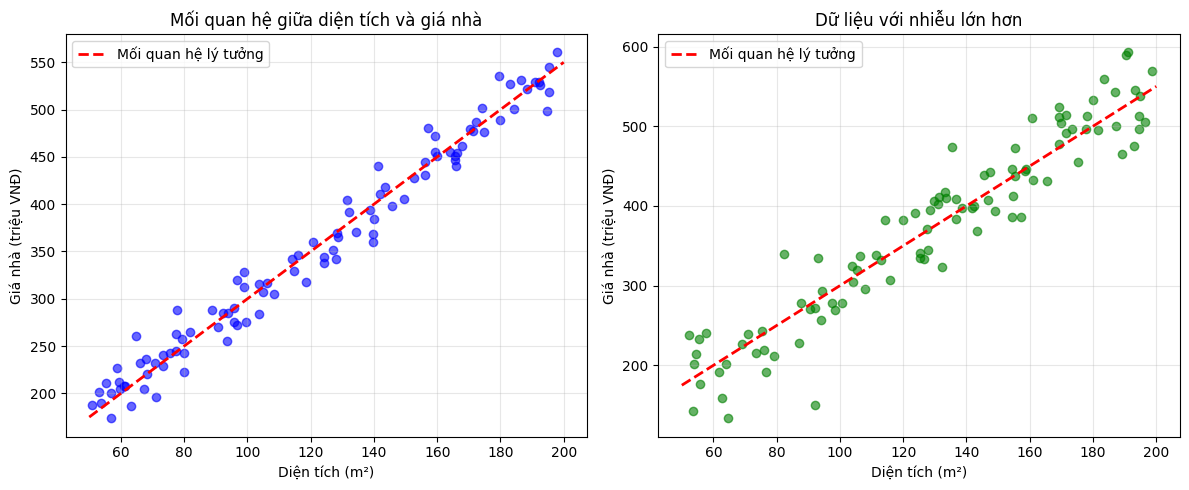

Kh√°m ph√° m·ªëi quan h·ªá tuy·∫øn t√≠nh:
H·ªá s·ªë t∆∞∆°ng quan (d·ªØ li·ªáu √≠t nhi·ªÖu): 0.987
H·ªá s·ªë t∆∞∆°ng quan (d·ªØ li·ªáu nhi·ªÅu nhi·ªÖu): 0.952


In [2]:
# =============================================================================
# IMPORT LIBRARIES - NH·∫¨P C√ÅC TH·ª® VI·ªÜN C·∫¶N THI·∫æT
# =============================================================================

import numpy as np  
# NumPy: Th∆∞ vi·ªán to√°n h·ªçc c∆° b·∫£n cho Python
# - L√†m vi·ªác v·ªõi arrays (m·∫£ng) v√† ma tr·∫≠n
# - C√°c ph√©p to√°n to√°n h·ªçc nhanh (linear algebra)
# - T·∫°o s·ªë ng·∫´u nhi√™n, x·ª≠ l√Ω d·ªØ li·ªáu s·ªë
# VD: np.array([1,2,3]), np.random.uniform(), np.linspace()

import matplotlib.pyplot as plt
# Matplotlib: Th∆∞ vi·ªán v·∫Ω bi·ªÉu ƒë·ªì ch√≠nh c·ªßa Python
# - plt.scatter(): v·∫Ω bi·ªÉu ƒë·ªì scatter (ƒëi·ªÉm r·∫£i)
# - plt.plot(): v·∫Ω ƒë∆∞·ªùng th·∫≥ng, ƒë∆∞·ªùng cong
# - plt.xlabel(), plt.ylabel(): ƒë·∫∑t t√™n tr·ª•c
# - plt.show(): hi·ªÉn th·ªã bi·ªÉu ƒë·ªì

from sklearn.linear_model import LinearRegression
# Scikit-learn: Th∆∞ vi·ªán Machine Learning ph·ªï bi·∫øn nh·∫•t Python
# - LinearRegression: class ƒë·ªÉ l√†m h·ªìi quy tuy·∫øn t√≠nh
# - ƒê√£ ƒë∆∞·ª£c t·ªëi ∆∞u, d·ªÖ s·ª≠ d·ª•ng v·ªõi .fit(), .predict()
# - T·ª± ƒë·ªông t√≠nh c√°c h·ªá s·ªë a, b trong ph∆∞∆°ng tr√¨nh y = ax + b

from sklearn.model_selection import train_test_split
# train_test_split: H√†m chia d·ªØ li·ªáu th√†nh 2 ph·∫ßn
# - Training set (70-80%): d√πng ƒë·ªÉ "d·∫°y" m√¥ h√¨nh
# - Test set (20-30%): d√πng ƒë·ªÉ ki·ªÉm tra ƒë·ªô ch√≠nh x√°c
# - Tr√°nh overfitting (h·ªçc thu·ªôc l√≤ng thay v√¨ h·ªçc quy lu·∫≠t)

from sklearn.metrics import mean_squared_error, r2_score
# Metrics: C√°c h√†m ƒëo hi·ªáu su·∫•t m√¥ h√¨nh
# - mean_squared_error: Sai s·ªë b√¨nh ph∆∞∆°ng trung b√¨nh (MSE)
# - r2_score: H·ªá s·ªë R¬≤ (0-1, c√†ng g·∫ßn 1 c√†ng t·ªët)
# - Gi√∫p ƒë√°nh gi√° m√¥ h√¨nh c√≥ d·ª± ƒëo√°n ch√≠nh x√°c kh√¥ng

import pandas as pd
# Pandas: Th∆∞ vi·ªán x·ª≠ l√Ω d·ªØ li·ªáu d·∫°ng b·∫£ng
# - DataFrame: nh∆∞ Excel trong Python
# - ƒê·ªçc CSV, Excel, x·ª≠ l√Ω missing data
# - (Code n√†y ch∆∞a d√πng pandas, nh∆∞ng import s·∫µn)

import warnings
warnings.filterwarnings('ignore')
# Warnings: T·∫Øt c√°c c·∫£nh b√°o kh√¥ng quan tr·ªçng
# - filterwarnings('ignore'): b·ªè qua t·∫•t c·∫£ warning
# - Gi√∫p output s·∫°ch s·∫Ω, kh√¥ng b·ªã spam th√¥ng b√°o

# =============================================================================
# T·∫†O D·ªÆ LI·ªÜU M·∫™U - SIMULATION DATA
# =============================================================================

np.random.seed(42)
# Set seed cho random number generator
# - seed(42): ƒê·∫£m b·∫£o k·∫øt qu·∫£ random lu√¥n gi·ªëng nhau m·ªói l·∫ßn ch·∫°y
# - Quan tr·ªçng cho reproducibility (t√°i l·∫≠p k·∫øt qu·∫£)
# - 42 l√† s·ªë n·ªïi ti·∫øng trong "Hitchhiker's Guide to Galaxy"

n_samples = 100
# S·ªë l∆∞·ª£ng m·∫´u d·ªØ li·ªáu
# - 100 cƒÉn nh√† ƒë·ªÉ l√†m d·ªØ li·ªáu training
# - ƒê·ªß nhi·ªÅu ƒë·ªÉ th·∫•y pattern, kh√¥ng qu√° nhi·ªÅu ƒë·ªÉ x·ª≠ l√Ω nhanh

# =============================================================================
# T·∫†O D·ªÆ LI·ªÜU ƒê∆†N GI·∫¢N: GI√Å NH√Ä D·ª∞A TR√äN DI·ªÜN T√çCH
# =============================================================================

dien_tich = np.random.uniform(50, 200, n_samples)
# np.random.uniform(min, max, s·ªë_l∆∞·ª£ng): T·∫°o s·ªë ng·∫´u nhi√™n ph√¢n ph·ªëi ƒë·ªÅu
# - Di·ªán t√≠ch t·ª´ 50m¬≤ ƒë·∫øn 200m¬≤ 
# - Ph√¢n ph·ªëi ƒë·ªÅu: m·ªçi gi√° tr·ªã c√≥ x√°c su·∫•t b·∫±ng nhau
# - M√¥ ph·ªèng di·ªán t√≠ch nh√† th·ª±c t·∫ø ·ªü VN

gia_that = 2.5 * dien_tich + 50 + np.random.normal(0, 20, n_samples)
# C√¥ng th·ª©c t·∫°o gi√° nh√† th·∫≠t:
# gia_that = 2.5 * dien_tich + 50 + nhi·ªÖu
# 
# Ph√¢n t√≠ch t·ª´ng ph·∫ßn:
# - 2.5: H·ªá s·ªë g√≥c (m·ªói m¬≤ tƒÉng th√™m 2.5 tri·ªáu)
# - 50: H·ªá s·ªë t·ª± do (gi√° c·ªë ƒë·ªãnh, VD: gi√° ƒë·∫•t)
# - np.random.normal(0, 20, n_samples): Nhi·ªÖu Gaussian
#   * 0: mean (trung b√¨nh nhi·ªÖu = 0)
#   * 20: std (ƒë·ªô l·ªách chu·∫©n = 20 tri·ªáu)
#   * M√¥ ph·ªèng c√°c y·∫øu t·ªë kh√¥ng d·ª± ƒëo√°n ƒë∆∞·ª£c (v·ªã tr√≠, trang tr√≠...)

# =============================================================================
# V·∫º BI·ªÇU ƒê·ªí ƒê·ªÇ HI·ªÇU M·ªêI QUAN H·ªÜ
# =============================================================================

plt.figure(figsize=(12, 5))
# T·∫°o figure v·ªõi k√≠ch th∆∞·ªõc 12x5 inches
# - figsize=(width, height): K√≠ch th∆∞·ªõc bi·ªÉu ƒë·ªì
# - 12x5: ƒê·ªß r·ªông ƒë·ªÉ ch·ª©a 2 subplot c·∫°nh nhau

plt.subplot(1, 2, 1)
# Chia figure th√†nh l∆∞·ªõi 1 h√†ng, 2 c·ªôt, ch·ªçn v·ªã tr√≠ th·ª© 1
# - subplot(rows, cols, position): T·∫°o nhi·ªÅu bi·ªÉu ƒë·ªì trong 1 figure
# - (1, 2, 1): 1 h√†ng, 2 c·ªôt, v·ªã tr√≠ 1 (b√™n tr√°i)

plt.scatter(dien_tich, gia_that, alpha=0.6, color='blue')
# V·∫Ω scatter plot (bi·ªÉu ƒë·ªì ph√¢n t√°n)
# - scatter(x, y): x=di·ªán t√≠ch, y=gi√° nh√†
# - alpha=0.6: ƒê·ªô trong su·ªët (0=trong su·ªët, 1=ƒë·∫∑c)
# - color='blue': M√†u xanh d∆∞∆°ng
# - M·ªói ƒëi·ªÉm = 1 cƒÉn nh√† v·ªõi (di·ªán t√≠ch, gi√°)

plt.xlabel('Di·ªán t√≠ch (m¬≤)')
plt.ylabel('Gi√° nh√† (tri·ªáu VNƒê)')
plt.title('M·ªëi quan h·ªá gi·ªØa di·ªán t√≠ch v√† gi√° nh√†')
# ƒê·∫∑t t√™n cho c√°c tr·ª•c v√† ti√™u ƒë·ªÅ
# - xlabel: t√™n tr·ª•c ho√†nh (X-axis)
# - ylabel: t√™n tr·ª•c tung (Y-axis)  
# - title: ti√™u ƒë·ªÅ bi·ªÉu ƒë·ªì

plt.grid(True, alpha=0.3)
# V·∫Ω l∆∞·ªõi tr√™n bi·ªÉu ƒë·ªì
# - grid(True): b·∫≠t l∆∞·ªõi
# - alpha=0.3: l∆∞·ªõi m·ªù, kh√¥ng che m·∫•t d·ªØ li·ªáu

# =============================================================================
# V·∫º ƒê∆Ø·ªúNG H·ªíI QUY L√ù T∆Ø·ªûNG
# =============================================================================

x_ly_tuong = np.linspace(50, 200, 100)
# T·∫°o 100 ƒëi·ªÉm ƒë·ªÅu nhau t·ª´ 50 ƒë·∫øn 200
# - linspace(start, stop, num): Chia ƒëo·∫°n [50,200] th√†nh 100 ph·∫ßn b·∫±ng nhau
# - D√πng ƒë·ªÉ v·∫Ω ƒë∆∞·ªùng th·∫≥ng m∆∞·ª£t

y_ly_tuong = 2.5 * x_ly_tuong + 50
# T√≠nh gi√° nh√† theo c√¥ng th·ª©c l√Ω t∆∞·ªüng (KH√îNG c√≥ nhi·ªÖu)
# - y = 2.5x + 50: ƒê∆∞·ªùng th·∫≥ng ho√†n h·∫£o
# - ƒê√¢y l√† "ground truth" - s·ª± th·∫≠t c·∫ßn t√¨m

plt.plot(x_ly_tuong, y_ly_tuong, 'r--', linewidth=2, label='M·ªëi quan h·ªá l√Ω t∆∞·ªüng')
# V·∫Ω ƒë∆∞·ªùng th·∫≥ng
# - plot(x, y): v·∫Ω ƒë∆∞·ªùng li·ªÅn
# - 'r--': m√†u ƒë·ªè (r=red), n√©t ƒë·ª©t (--)
# - linewidth=2: ƒë·ªô d√†y ƒë∆∞·ªùng = 2
# - label: t√™n cho legend

plt.legend()
# Hi·ªÉn th·ªã ch√∫ th√≠ch (legend) v·ªõi c√°c label ƒë√£ ƒë·∫∑t

# =============================================================================
# V·∫º BI·ªÇU ƒê·ªí V·ªöI NHI·ªÑU NHI·ªÄU H·ªöN
# =============================================================================

dien_tich_nhieu = np.random.uniform(50, 200, n_samples)
# T·∫°o d·ªØ li·ªáu di·ªán t√≠ch m·ªõi (gi·ªëng nh∆∞ tr√™n)

gia_nhieu = 2.5 * dien_tich_nhieu + 50 + np.random.normal(0, 40, n_samples)
# T·∫°o gi√° nh√† v·ªõi NHI·ªÑU L·ªöN H∆†N
# - np.random.normal(0, 40): std=40 thay v√¨ 20
# - Nhi·ªÖu g·∫•p ƒë√¥i ‚Üí d·ªØ li·ªáu ph√¢n t√°n h∆°n
# - M√¥ ph·ªèng tr∆∞·ªùng h·ª£p d·ªØ li·ªáu "b·∫©n" h∆°n

plt.subplot(1, 2, 2)
# Chuy·ªÉn sang subplot th·ª© 2 (b√™n ph·∫£i)

plt.scatter(dien_tich_nhieu, gia_nhieu, alpha=0.6, color='green')
# V·∫Ω scatter plot v·ªõi d·ªØ li·ªáu nhi·ªÖu l·ªõn
# - color='green': m√†u xanh l√° ƒë·ªÉ ph√¢n bi·ªát

plt.xlabel('Di·ªán t√≠ch (m¬≤)')
plt.ylabel('Gi√° nh√† (tri·ªáu VNƒê)')
plt.title('D·ªØ li·ªáu v·ªõi nhi·ªÖu l·ªõn h∆°n')
plt.grid(True, alpha=0.3)
plt.plot(x_ly_tuong, y_ly_tuong, 'r--', linewidth=2, label='M·ªëi quan h·ªá l√Ω t∆∞·ªüng')
plt.legend()
# Gi·ªëng subplot 1, nh∆∞ng v·ªõi d·ªØ li·ªáu nhi·ªÖu l·ªõn h∆°n

plt.tight_layout()
# T·ª± ƒë·ªông ƒëi·ªÅu ch·ªânh kho·∫£ng c√°ch gi·ªØa c√°c subplot
# - Tr√°nh ch·ªìng ch√©o text, title
# - L√†m bi·ªÉu ƒë·ªì ƒë·∫πp v√† d·ªÖ ƒë·ªçc h∆°n

plt.show()
# Hi·ªÉn th·ªã t·∫•t c·∫£ bi·ªÉu ƒë·ªì ƒë√£ v·∫Ω

# =============================================================================
# T√çNH TO√ÅN V√Ä IN K·∫æT QU·∫¢
# =============================================================================

print("Kh√°m ph√° m·ªëi quan h·ªá tuy·∫øn t√≠nh:")

print(f"H·ªá s·ªë t∆∞∆°ng quan (d·ªØ li·ªáu √≠t nhi·ªÖu): {np.corrcoef(dien_tich, gia_that)[0,1]:.3f}")
# np.corrcoef(): T√≠nh ma tr·∫≠n correlation (t∆∞∆°ng quan)
# - corrcoef(x, y): tr·∫£ v·ªÅ ma tr·∫≠n 2x2
# - [0,1] ho·∫∑c [1,0]: l·∫•y h·ªá s·ªë t∆∞∆°ng quan gi·ªØa x v√† y
# - :.3f: format s·ªë th·∫≠p ph√¢n 3 ch·ªØ s·ªë
# - Correlation: -1 (ngh·ªãch bi·∫øn ho√†n h·∫£o) ƒë·∫øn +1 (ƒë·ªìng bi·∫øn ho√†n h·∫£o)
# - G·∫ßn +1: di·ªán t√≠ch tƒÉng ‚Üí gi√° tƒÉng m·∫°nh

print(f"H·ªá s·ªë t∆∞∆°ng quan (d·ªØ li·ªáu nhi·ªÅu nhi·ªÖu): {np.corrcoef(dien_tich_nhieu, gia_nhieu)[0,1]:.3f}")
# So s√°nh correlation gi·ªØa 2 dataset
# - Dataset √≠t nhi·ªÖu: correlation cao h∆°n (g·∫ßn 1)
# - Dataset nhi·ªÅu nhi·ªÖu: correlation th·∫•p h∆°n
# - Cho th·∫•y nhi·ªÖu l√†m gi·∫£m ƒë·ªô t∆∞∆°ng quan

# =============================================================================
# K·∫æT QU·∫¢ MONG ƒê·ª¢I:
# =============================================================================
# - Bi·ªÉu ƒë·ªì 1: C√°c ƒëi·ªÉm g·∫ßn ƒë∆∞·ªùng th·∫≥ng, correlation cao (~0.9+)
# - Bi·ªÉu ƒë·ªì 2: C√°c ƒëi·ªÉm r·∫£i r√°c h∆°n, correlation th·∫•p h∆°n (~0.7-0.8)
# - Cho th·∫•y: nhi·ªÖu c√†ng l·ªõn ‚Üí model c√†ng kh√≥ h·ªçc ch√≠nh x√°c

In [3]:
def giai_thich_phuong_trinh_hoi_quy():
    """
    Gi·∫£i th√≠ch chi ti·∫øt ph∆∞∆°ng tr√¨nh h·ªìi quy tuy·∫øn t√≠nh
    """
    print("=== PH∆Ø∆†NG TR√åNH H·ªíI QUY TUY·∫æN T√çNH ===")
    print()
    print("D·∫°ng t·ªïng qu√°t: y = w‚ÇÄ + w‚ÇÅx‚ÇÅ + w‚ÇÇx‚ÇÇ + ... + w‚Çôx‚Çô")
    print()
    print("Trong ƒë√≥:")
    print("- y: bi·∫øn m·ª•c ti√™u (target variable) - gi√° tr·ªã ch√∫ng ta mu·ªën d·ª± ƒëo√°n")
    print("- x‚ÇÅ, x‚ÇÇ, ..., x‚Çô: c√°c bi·∫øn ƒë·∫∑c tr∆∞ng (features)")
    print("- w‚ÇÄ: bias/intercept - gi√° tr·ªã y khi t·∫•t c·∫£ x = 0")
    print("- w‚ÇÅ, w‚ÇÇ, ..., w‚Çô: tr·ªçng s·ªë (weights) - cho bi·∫øt m·ª©c ƒë·ªô ·∫£nh h∆∞·ªüng c·ªßa t·ª´ng ƒë·∫∑c tr∆∞ng")
    print()
    
    # V√≠ d·ª• c·ª• th·ªÉ
    print("V√≠ d·ª• d·ª± ƒëo√°n gi√° nh√†:")
    print("gi√°_nh√† = w‚ÇÄ + w‚ÇÅ√ódi·ªán_t√≠ch + w‚ÇÇ√ós·ªë_ph√≤ng + w‚ÇÉ√ótu·ªïi_nh√†")
    print()
    print("N·∫øu w‚ÇÄ=50, w‚ÇÅ=2.5, w‚ÇÇ=10, w‚ÇÉ=-0.8:")
    print("- CƒÉn nh√† 100m¬≤, 3 ph√≤ng, 5 nƒÉm tu·ªïi:")
    
    w0, w1, w2, w3 = 50, 2.5, 10, -0.8
    dien_tich, so_phong, tuoi_nha = 100, 3, 5
    gia_du_doan = w0 + w1*dien_tich + w2*so_phong + w3*tuoi_nha
    
    print(f"  gi√° = {w0} + {w1}√ó{dien_tich} + {w2}√ó{so_phong} + {w3}√ó{tuoi_nha}")
    print(f"  gi√° = {w0} + {w1*dien_tich} + {w2*so_phong} + {w3*tuoi_nha}")
    print(f"  gi√° = {gia_du_doan} tri·ªáu VNƒê")
    print()
    print("√ù nghƒ©a c√°c tr·ªçng s·ªë:")
    print(f"- w‚ÇÅ = {w1}: m·ªói m¬≤ tƒÉng gi√° {w1} tri·ªáu")
    print(f"- w‚ÇÇ = {w2}: m·ªói ph√≤ng tƒÉng gi√° {w2} tri·ªáu")
    print(f"- w‚ÇÉ = {w3}: m·ªói nƒÉm tu·ªïi gi·∫£m gi√° {abs(w3)} tri·ªáu")

giai_thich_phuong_trinh_hoi_quy()

=== PH∆Ø∆†NG TR√åNH H·ªíI QUY TUY·∫æN T√çNH ===

D·∫°ng t·ªïng qu√°t: y = w‚ÇÄ + w‚ÇÅx‚ÇÅ + w‚ÇÇx‚ÇÇ + ... + w‚Çôx‚Çô

Trong ƒë√≥:
- y: bi·∫øn m·ª•c ti√™u (target variable) - gi√° tr·ªã ch√∫ng ta mu·ªën d·ª± ƒëo√°n
- x‚ÇÅ, x‚ÇÇ, ..., x‚Çô: c√°c bi·∫øn ƒë·∫∑c tr∆∞ng (features)
- w‚ÇÄ: bias/intercept - gi√° tr·ªã y khi t·∫•t c·∫£ x = 0
- w‚ÇÅ, w‚ÇÇ, ..., w‚Çô: tr·ªçng s·ªë (weights) - cho bi·∫øt m·ª©c ƒë·ªô ·∫£nh h∆∞·ªüng c·ªßa t·ª´ng ƒë·∫∑c tr∆∞ng

V√≠ d·ª• d·ª± ƒëo√°n gi√° nh√†:
gi√°_nh√† = w‚ÇÄ + w‚ÇÅ√ódi·ªán_t√≠ch + w‚ÇÇ√ós·ªë_ph√≤ng + w‚ÇÉ√ótu·ªïi_nh√†

N·∫øu w‚ÇÄ=50, w‚ÇÅ=2.5, w‚ÇÇ=10, w‚ÇÉ=-0.8:
- CƒÉn nh√† 100m¬≤, 3 ph√≤ng, 5 nƒÉm tu·ªïi:
  gi√° = 50 + 2.5√ó100 + 10√ó3 + -0.8√ó5
  gi√° = 50 + 250.0 + 30 + -4.0
  gi√° = 326.0 tri·ªáu VNƒê

√ù nghƒ©a c√°c tr·ªçng s·ªë:
- w‚ÇÅ = 2.5: m·ªói m¬≤ tƒÉng gi√° 2.5 tri·ªáu
- w‚ÇÇ = 10: m·ªói ph√≤ng tƒÉng gi√° 10 tri·ªáu
- w‚ÇÉ = -0.8: m·ªói nƒÉm tu·ªïi gi·∫£m gi√° 0.8 tri·ªáu


In [4]:
def giai_thich_dang_ma_tran():
    """
    Gi·∫£i th√≠ch d·∫°ng ma tr·∫≠n c·ªßa h·ªìi quy tuy·∫øn t√≠nh
    """
    print("=== D·∫†NG MA TR·∫¨N C·ª¶A H·ªíI QUY TUY·∫æN T√çNH ===")
    print()
    
    # T·∫°o d·ªØ li·ªáu m·∫´u
    n_samples, n_features = 5, 3
    
    # Ma tr·∫≠n ƒë·∫∑c tr∆∞ng X (th√™m c·ªôt 1 cho bias)
    X = np.array([
        [1, 100, 3, 5],    # 1 (bias), di·ªán t√≠ch, s·ªë ph√≤ng, tu·ªïi nh√†
        [1, 80, 2, 10],
        [1, 120, 4, 2],
        [1, 90, 2, 8],
        [1, 150, 5, 1]
    ])
    
    # Vector tr·ªçng s·ªë
    w = np.array([50, 2.5, 10, -0.8])  # w‚ÇÄ, w‚ÇÅ, w‚ÇÇ, w‚ÇÉ
    
    # Vector m·ª•c ti√™u th·∫≠t
    y_that = np.array([295, 245, 368, 267, 425])
    
    print("Ma tr·∫≠n ƒë·∫∑c tr∆∞ng X (5 m·∫´u, 4 ƒë·∫∑c tr∆∞ng bao g·ªìm bias):")
    print("      bias  di·ªán_t√≠ch  s·ªë_ph√≤ng  tu·ªïi_nh√†")
    for i, row in enumerate(X):
        print(f"M·∫´u {i+1}: {row}")
    
    print(f"\nVector tr·ªçng s·ªë w: {w}")
    print("(w‚ÇÄ=bias, w‚ÇÅ=h·ªá s·ªë di·ªán t√≠ch, w‚ÇÇ=h·ªá s·ªë s·ªë ph√≤ng, w‚ÇÉ=h·ªá s·ªë tu·ªïi nh√†)")
    
    # T√≠nh d·ª± ƒëo√°n
    y_du_doan = X @ w  # Ph√©p nh√¢n ma tr·∫≠n
    
    print(f"\nD·ª± ƒëo√°n: y = X @ w")
    print("K·∫øt qu·∫£ d·ª± ƒëo√°n:")
    for i in range(len(y_du_doan)):
        print(f"M·∫´u {i+1}: {y_du_doan[i]:.1f} tri·ªáu (th·ª±c t·∫ø: {y_that[i]} tri·ªáu)")
    
    # T√≠nh sai s·ªë
    sai_so = y_that - y_du_doan
    print(f"\nSai s·ªë trung b√¨nh: {np.mean(np.abs(sai_so)):.2f} tri·ªáu")
    print(f"Sai s·ªë b√¨nh ph∆∞∆°ng trung b√¨nh: {np.mean(sai_so**2):.2f}")

giai_thich_dang_ma_tran()

=== D·∫†NG MA TR·∫¨N C·ª¶A H·ªíI QUY TUY·∫æN T√çNH ===

Ma tr·∫≠n ƒë·∫∑c tr∆∞ng X (5 m·∫´u, 4 ƒë·∫∑c tr∆∞ng bao g·ªìm bias):
      bias  di·ªán_t√≠ch  s·ªë_ph√≤ng  tu·ªïi_nh√†
M·∫´u 1: [  1 100   3   5]
M·∫´u 2: [ 1 80  2 10]
M·∫´u 3: [  1 120   4   2]
M·∫´u 4: [ 1 90  2  8]
M·∫´u 5: [  1 150   5   1]

Vector tr·ªçng s·ªë w: [50.   2.5 10.  -0.8]
(w‚ÇÄ=bias, w‚ÇÅ=h·ªá s·ªë di·ªán t√≠ch, w‚ÇÇ=h·ªá s·ªë s·ªë ph√≤ng, w‚ÇÉ=h·ªá s·ªë tu·ªïi nh√†)

D·ª± ƒëo√°n: y = X @ w
K·∫øt qu·∫£ d·ª± ƒëo√°n:
M·∫´u 1: 326.0 tri·ªáu (th·ª±c t·∫ø: 295 tri·ªáu)
M·∫´u 2: 262.0 tri·ªáu (th·ª±c t·∫ø: 245 tri·ªáu)
M·∫´u 3: 388.4 tri·ªáu (th·ª±c t·∫ø: 368 tri·ªáu)
M·∫´u 4: 288.6 tri·ªáu (th·ª±c t·∫ø: 267 tri·ªáu)
M·∫´u 5: 474.2 tri·ªáu (th·ª±c t·∫ø: 425 tri·ªáu)

Sai s·ªë trung b√¨nh: 27.84 tri·ªáu
Sai s·ªë b√¨nh ph∆∞∆°ng trung b√¨nh: 910.67


=== H√ÄM M·∫§T M√ÅT (LOSS FUNCTION) ===

D·ªØ li·ªáu m·∫´u:
x=1, y=2
x=2, y=4
x=3, y=6
x=4, y=8
x=5, y=10

H·ªá s·ªë g√≥c t·ªëi ∆∞u: 1.985
MSE t·ªëi ∆∞u: 0.002525


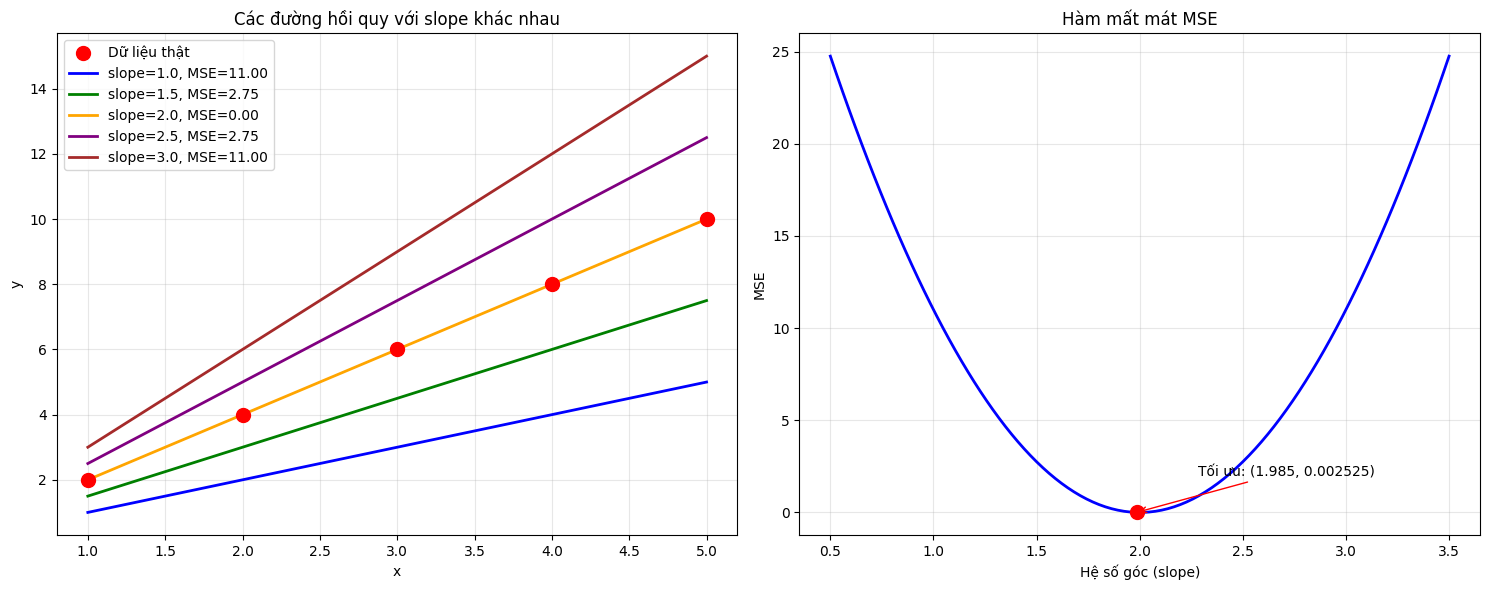

In [5]:
# =============================================================================
# H√ÄM MINH H·ªåA H√ÄM M·∫§T M√ÅT (LOSS FUNCTION) - TR√ÅI TIM C·ª¶A MACHINE LEARNING
# =============================================================================

def minh_hoa_ham_mat_mat():
    """
    Minh h·ªça h√†m m·∫•t m√°t cho h·ªìi quy tuy·∫øn t√≠nh
    
    M·ª§C ƒê√çCH:
    - Hi·ªÉu h√†m m·∫•t m√°t l√† g√¨ v√† t·∫°i sao quan tr·ªçng
    - Th·∫•y c√°ch m√°y t√≠nh "h·ªçc" b·∫±ng c√°ch t·ªëi ∆∞u h√≥a
    - Tr·ª±c quan h√≥a qu√° tr√¨nh t√¨m tham s·ªë t·ªëi ∆∞u
    """
    print("=== H√ÄM M·∫§T M√ÅT (LOSS FUNCTION) ===")
    print()
    
    # =================================================================
    # T·∫†O D·ªÆ LI·ªÜU ƒê·ªöN GI·∫¢N ƒê·ªÇ D·ªÑ HI·ªÇU
    # =================================================================
    
    np.random.seed(42)
    # C·ªë ƒë·ªãnh seed ƒë·ªÉ k·∫øt qu·∫£ lu√¥n gi·ªëng nhau
    
    x = np.array([1, 2, 3, 4, 5])
    y_that = np.array([2, 4, 6, 8, 10])  # M·ªëi quan h·ªá ho√†n h·∫£o: y = 2x
    
    # GI·∫¢I TH√çCH D·ªÆ LI·ªÜU:
    # - x: [1, 2, 3, 4, 5] - Input features (VD: di·ªán t√≠ch nh√†)
    # - y_that: [2, 4, 6, 8, 10] - Target values (VD: gi√° nh√† th·∫≠t)
    # - Quan h·ªá: y = 2x (ho√†n h·∫£o, kh√¥ng c√≥ nhi·ªÖu)
    # - M·ª•c ti√™u: M√°y t√≠nh ph·∫£i T·ª∞ T√åM ra h·ªá s·ªë "2" n√†y!
    
    print("D·ªØ li·ªáu m·∫´u:")
    for i in range(len(x)):
        print(f"x={x[i]}, y={y_that[i]}")
        # In t·ª´ng c·∫∑p (input, output) ƒë·ªÉ th·∫•y r√µ pattern
    
    # =================================================================
    # TH·ª¨ NHI·ªÄU GI√Å TR·ªä KH√ÅC NHAU CHO H·ªÜ S·ªê G√ìC
    # =================================================================
    
    slopes = np.linspace(0.5, 3.5, 100)
    # T·∫°o 100 gi√° tr·ªã h·ªá s·ªë g√≥c t·ª´ 0.5 ƒë·∫øn 3.5
    # - linspace(start, stop, num): chia ƒë·ªÅu kho·∫£ng [0.5, 3.5]
    # - VD: [0.5, 0.53, 0.56, ..., 3.47, 3.5]
    # - Gi·ªëng nh∆∞ th·ª≠ 100 "guess" kh√°c nhau cho h·ªá s·ªë
    
    mse_values = []
    # List ƒë·ªÉ l∆∞u gi√° tr·ªã MSE t∆∞∆°ng ·ª©ng v·ªõi m·ªói slope
    # - S·∫Ω c√≥ 100 gi√° tr·ªã MSE t∆∞∆°ng ·ª©ng 100 slopes
    
    # =================================================================
    # V√íNG L·∫∂P T√çNH TO√ÅN: TH·ª¨ T·ª™NG H·ªÜ S·ªê V√Ä T√çNH SAI S·ªê
    # =================================================================
    
    for slope in slopes:
        # V·ªõi m·ªói h·ªá s·ªë g√≥c, ta s·∫Ω:
        
        # 1. D·ª∞ ƒêO√ÅN v·ªõi bias=0 ƒë·ªÉ ƒë∆°n gi·∫£n
        y_du_doan = slope * x
        # C√¥ng th·ª©c: y = slope * x + 0
        # VD: slope=1.5 ‚Üí y_du_doan = [1.5, 3.0, 4.5, 6.0, 7.5]
        
        # 2. T√çNH SAI S·ªê gi·ªØa d·ª± ƒëo√°n v√† th·ª±c t·∫ø
        mse = np.mean((y_that - y_du_doan)**2)
        # MSE = Mean Squared Error (Sai s·ªë b√¨nh ph∆∞∆°ng trung b√¨nh)
        # C√¥ng th·ª©c: MSE = (1/n) * Œ£(y_th·∫≠t - y_d·ª±_ƒëo√°n)¬≤
        # 
        # T·∫°i sao b√¨nh ph∆∞∆°ng?
        # - (y_th·∫≠t - y_d·ª±_ƒëo√°n) c√≥ th·ªÉ √¢m ho·∫∑c d∆∞∆°ng
        # - B√¨nh ph∆∞∆°ng ‚Üí lu√¥n d∆∞∆°ng, kh√¥ng tri·ªát ti√™u nhau
        # - Ph·∫°t n·∫∑ng nh·ªØng sai s·ªë l·ªõn h∆°n sai s·ªë nh·ªè
        
        mse_values.append(mse)
        # L∆∞u MSE v√†o list ƒë·ªÉ v·∫Ω bi·ªÉu ƒë·ªì sau
    
    # =================================================================
    # T√åM ƒêI·ªÇM T·ªêI ∆ØU - N∆†I M√ÅY T√çNH "H·ªåC" ƒê∆Ø·ª¢C
    # =================================================================
    
    min_idx = np.argmin(mse_values)
    # argmin(): t√¨m INDEX c·ªßa gi√° tr·ªã nh·ªè nh·∫•t trong array
    # VD: mse_values = [10, 5, 2, 8] ‚Üí argmin = 2 (index c·ªßa gi√° tr·ªã 2)
    
    slope_toi_uu = slopes[min_idx]
    # L·∫•y slope t∆∞∆°ng ·ª©ng v·ªõi MSE nh·ªè nh·∫•t
    # ƒê√¢y ch√≠nh l√† k·∫øt qu·∫£ "h·ªçc" c·ªßa m√°y t√≠nh!
    
    mse_toi_uu = mse_values[min_idx]
    # MSE nh·ªè nh·∫•t ƒë·∫°t ƒë∆∞·ª£c
    
    print(f"\nH·ªá s·ªë g√≥c t·ªëi ∆∞u: {slope_toi_uu:.3f}")
    print(f"MSE t·ªëi ∆∞u: {mse_toi_uu:.6f}")
    # K·∫øt qu·∫£ mong ƒë·ª£i: slope ‚âà 2.0, MSE ‚âà 0 (v√¨ d·ªØ li·ªáu ho√†n h·∫£o)
    
    # =================================================================
    # V·∫º BI·ªÇU ƒê·ªí TR·ª∞C QUAN H√ìA
    # =================================================================
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    # T·∫°o 2 subplot c·∫°nh nhau, k√≠ch th∆∞·ªõc 15x6 inches
    # - axes[0]: Bi·ªÉu ƒë·ªì d·ªØ li·ªáu v·ªõi c√°c ƒë∆∞·ªùng h·ªìi quy
    # - axes[1]: Bi·ªÉu ƒë·ªì h√†m m·∫•t m√°t
    
    # =================================================================
    # BI·ªÇU ƒê·ªí 1: D·ªÆ LI·ªÜU V·ªöI C√ÅC ƒê∆Ø·ªúNG TH·∫≤NG KH√ÅC NHAU
    # =================================================================
    
    axes[0].scatter(x, y_that, color='red', s=100, label='D·ªØ li·ªáu th·∫≠t', zorder=3)
    # V·∫Ω c√°c ƒëi·ªÉm d·ªØ li·ªáu th·∫≠t
    # - scatter(): bi·ªÉu ƒë·ªì ph√¢n t√°n
    # - s=100: k√≠ch th∆∞·ªõc ƒëi·ªÉm
    # - zorder=3: layer cao nh·∫•t (hi·ªán tr√™n c√πng)
    
    # V·∫Ω m·ªôt v√†i ƒë∆∞·ªùng th·∫≥ng v·ªõi c√°c slope kh√°c nhau
    test_slopes = [1.0, 1.5, 2.0, 2.5, 3.0]
    colors = ['blue', 'green', 'orange', 'purple', 'brown']
    # 5 h·ªá s·ªë kh√°c nhau ƒë·ªÉ so s√°nh tr·ª±c quan
    
    for slope, color in zip(test_slopes, colors):
        # zip(): gh√©p 2 list l·∫°i: (1.0, 'blue'), (1.5, 'green'), ...
        
        y_pred = slope * x
        # T√≠nh d·ª± ƒëo√°n v·ªõi slope n√†y
        
        mse = np.mean((y_that - y_pred)**2)
        # T√≠nh MSE cho slope n√†y
        
        axes[0].plot(x, y_pred, color=color, linewidth=2, 
                    label=f'slope={slope}, MSE={mse:.2f}')
        # V·∫Ω ƒë∆∞·ªùng th·∫≥ng
        # - plot(): v·∫Ω ƒë∆∞·ªùng li·ªÅn
        # - label: t√™n hi·ªán trong legend, bao g·ªìm MSE
    
    axes[0].set_xlabel('x')
    axes[0].set_ylabel('y')
    axes[0].set_title('C√°c ƒë∆∞·ªùng h·ªìi quy v·ªõi slope kh√°c nhau')
    axes[0].legend()  # Hi·ªÉn th·ªã ch√∫ th√≠ch
    axes[0].grid(True, alpha=0.3)  # L∆∞·ªõi m·ªù
    
    # =================================================================
    # BI·ªÇU ƒê·ªí 2: H√ÄM M·∫§T M√ÅT - TR√ÅI TIM C·ª¶A MACHINE LEARNING
    # =================================================================
    
    axes[1].plot(slopes, mse_values, 'b-', linewidth=2)
    # V·∫Ω ƒë∆∞·ªùng cong h√†m m·∫•t m√°t
    # - x-axis: c√°c gi√° tr·ªã slope (0.5 ‚Üí 3.5)
    # - y-axis: MSE t∆∞∆°ng ·ª©ng
    # - ƒê∆∞·ªùng cong h√¨nh ch·ªØ U (parabola)
    
    axes[1].scatter(slope_toi_uu, mse_toi_uu, color='red', s=100, zorder=3)
    # ƒê√°nh d·∫•u ƒëi·ªÉm t·ªëi ∆∞u (MSE nh·ªè nh·∫•t)
    # - ƒê√¢y l√† n∆°i m√°y t√≠nh "h·ªçc" ƒë∆∞·ª£c tham s·ªë t·ªët nh·∫•t
    
    axes[1].set_xlabel('H·ªá s·ªë g√≥c (slope)')
    axes[1].set_ylabel('MSE')
    axes[1].set_title('H√†m m·∫•t m√°t MSE')
    axes[1].grid(True, alpha=0.3)
    
    # Th√™m ch√∫ th√≠ch cho ƒëi·ªÉm t·ªëi ∆∞u
    axes[1].annotate(f'T·ªëi ∆∞u: ({slope_toi_uu:.3f}, {mse_toi_uu:.6f})', 
                     xy=(slope_toi_uu, mse_toi_uu),           # V·ªã tr√≠ ƒëi·ªÉm
                     xytext=(slope_toi_uu+0.3, mse_toi_uu+2), # V·ªã tr√≠ text
                     arrowprops=dict(arrowstyle='->', color='red'))  # M≈©i t√™n
    # annotate(): th√™m ch√∫ th√≠ch v·ªõi m≈©i t√™n ch·ªâ v√†o ƒëi·ªÉm quan tr·ªçng
    
    plt.tight_layout()  # T·ª± ƒë·ªông cƒÉn ch·ªânh layout
    plt.show()          # Hi·ªÉn th·ªã bi·ªÉu ƒë·ªì
    
    # =================================================================
    # TR·∫¢ V·ªÄ K·∫æT QU·∫¢ ƒê·ªÇ S·ª¨ D·ª§NG TI·∫æP
    # =================================================================
    
    return slopes, mse_values, slope_toi_uu
    # Return 3 gi√° tr·ªã:
    # - slopes: t·∫•t c·∫£ h·ªá s·ªë ƒë√£ th·ª≠
    # - mse_values: MSE t∆∞∆°ng ·ª©ng
    # - slope_toi_uu: h·ªá s·ªë t·ªët nh·∫•t t√¨m ƒë∆∞·ª£c

# =============================================================================
# CH·∫†Y H√ÄM V√Ä L∆ØU K·∫æT QU·∫¢
# =============================================================================

slopes, mse_values, slope_toi_uu = minh_hoa_ham_mat_mat()

# =============================================================================
# √ù NGHƒ®A V√Ä B√ÄI H·ªåC:
# =============================================================================

# 1. H√ÄM M·∫§T M√ÅT L√Ä G√å?
#    - Th∆∞·ªõc ƒëo ƒë·ªô "sai" c·ªßa m√¥ h√¨nh
#    - MSE: trung b√¨nh c·ªßa b√¨nh ph∆∞∆°ng c√°c sai s·ªë
#    - C√†ng nh·ªè = m√¥ h√¨nh c√†ng ch√≠nh x√°c

# 2. T·∫†I SAO B√åNH PH∆Ø∆†NG?
#    - Tr√°nh sai s·ªë √¢m/d∆∞∆°ng tri·ªát ti√™u nhau
#    - Ph·∫°t n·∫∑ng sai s·ªë l·ªõn h∆°n sai s·ªë nh·ªè
#    - T·∫°o h√†m convex (c√≥ 1 ƒëi·ªÉm t·ªëi ∆∞u duy nh·∫•t)

# 3. MACHINE LEARNING = T·ªêI ∆ØU H√ìA
#    - Th·ª≠ nhi·ªÅu tham s·ªë kh√°c nhau
#    - T√≠nh loss cho m·ªói tham s·ªë
#    - Ch·ªçn tham s·ªë c√≥ loss nh·ªè nh·∫•t
#    - ƒê√≥ ch√≠nh l√† "h·ªçc"!

# 4. GRADIENT DESCENT:
#    - Thay v√¨ th·ª≠ t·∫•t c·∫£ (brute force)
#    - D√πng ƒë·∫°o h√†m ƒë·ªÉ t√¨m h∆∞·ªõng gi·∫£m loss
#    - Di chuy·ªÉn theo h∆∞·ªõng ƒë√≥ ‚Üí t√¨m minimum nhanh h∆°n

# 5. K·∫æT QU·∫¢ MONG ƒê·ª¢I:
#    - Slope t·ªëi ∆∞u ‚âà 2.0 (ƒë√∫ng v·ªõi y = 2x)
#    - MSE t·ªëi ∆∞u ‚âà 0 (v√¨ d·ªØ li·ªáu ho√†n h·∫£o)
#    - Bi·ªÉu ƒë·ªì loss c√≥ d·∫°ng ch·ªØ U v·ªõi minimum t·∫°i slope=2

In [6]:
# =============================================================================
# ƒê·∫†O H√ÄM C·ª¶A H√ÄM M·∫§T M√ÅT - CH√åA KH√ìA C·ª¶A GRADIENT DESCENT
# =============================================================================

def giai_thich_dao_ham_ham_mat_mat():
    """
    Gi·∫£i th√≠ch c√°ch t√≠nh ƒë·∫°o h√†m c·ªßa h√†m m·∫•t m√°t
    
    T·∫†I SAO C·∫¶N ƒê·∫†O H√ÄM?
    - ƒê·∫°o h√†m cho bi·∫øt H∆Ø·ªöNG tƒÉng/gi·∫£m nhanh nh·∫•t c·ªßa h√†m s·ªë
    - Trong ML: d√πng ƒë·ªÉ t√¨m h∆∞·ªõng gi·∫£m loss function
    - Thay v√¨ th·ª≠ random ‚Üí di chuy·ªÉn th√¥ng minh theo gradient
    
    ANALOGY: 
    - Nh∆∞ ƒëi xu·ªëng n√∫i trong s∆∞∆°ng m√π
    - Kh√¥ng th·∫•y ƒë∆∞·ªùng ‚Üí c·∫£m nh·∫≠n ƒë·ªô d·ªëc b·∫±ng ch√¢n
    - B∆∞·ªõc theo h∆∞·ªõng d·ªëc nh·∫•t ‚Üí xu·ªëng ƒë√°y nhanh nh·∫•t
    """
    print("=== ƒê·∫†O H√ÄM C·ª¶A H√ÄM M·∫§T M√ÅT ===")
    print()
    
    # =================================================================
    # C√îNG TH·ª®C TO√ÅN H·ªåC C·ª¶A H√ÄM M·∫§T M√ÅT
    # =================================================================
    
    print("H√†m m·∫•t m√°t MSE: L(w) = (1/2m) √ó Œ£(y_th·∫≠t - y_d·ª±_ƒëo√°n)¬≤")
    print("Trong ƒë√≥: y_d·ª±_ƒëo√°n = w‚ÇÄ + w‚ÇÅx‚ÇÅ + w‚ÇÇx‚ÇÇ + ... + w‚Çôx‚Çô")
    print()
    
    # GI·∫¢I TH√çCH C√îNG TH·ª®C:
    # L(w): Loss function ph·ª• thu·ªôc v√†o weights w
    # (1/2m): H·ªá s·ªë chu·∫©n h√≥a
    #   - 1/m: chia cho s·ªë samples ƒë·ªÉ c√≥ trung b√¨nh
    #   - 1/2: ƒë·ªÉ khi ƒë·∫°o h√†m, 2 trong x¬≤ s·∫Ω tri·ªát ti√™u v·ªõi 1/2
    # Œ£: T·ªïng over t·∫•t c·∫£ training samples
    # (y_th·∫≠t - y_d·ª±_ƒëo√°n)¬≤: B√¨nh ph∆∞∆°ng sai s·ªë c·ªßa m·ªói sample
    
    # =================================================================
    # T√çNH ƒê·∫†O H√ÄM THEO T·ª™NG THAM S·ªê
    # =================================================================
    
    print("ƒê·∫°o h√†m theo w‚ÇÄ (bias):")
    print("‚àÇL/‚àÇw‚ÇÄ = -(1/m) √ó Œ£(y_th·∫≠t - y_d·ª±_ƒëo√°n)")
    print()
    
    # GI·∫¢I TH√çCH ƒê·∫†O H√ÄM THEO w‚ÇÄ:
    # y_d·ª±_ƒëo√°n = w‚ÇÄ + w‚ÇÅx‚ÇÅ + ... ‚Üí ‚àÇy_d·ª±_ƒëo√°n/‚àÇw‚ÇÄ = 1
    # √Åp d·ª•ng chain rule:
    # ‚àÇL/‚àÇw‚ÇÄ = ‚àÇL/‚àÇy_d·ª±_ƒëo√°n √ó ‚àÇy_d·ª±_ƒëo√°n/‚àÇw‚ÇÄ
    #         = -(y_th·∫≠t - y_d·ª±_ƒëo√°n) √ó 1
    #         = -(y_th·∫≠t - y_d·ª±_ƒëo√°n)
    # Trung b√¨nh over t·∫•t c·∫£ samples: -(1/m) √ó Œ£(y_th·∫≠t - y_d·ª±_ƒëo√°n)
    
    print("ƒê·∫°o h√†m theo w‚±º (j > 0):")
    print("‚àÇL/‚àÇw‚±º = -(1/m) √ó Œ£(y_th·∫≠t - y_d·ª±_ƒëo√°n) √ó x‚±º")
    print()
    
    # GI·∫¢I TH√çCH ƒê·∫†O H√ÄM THEO w‚±º:
    # y_d·ª±_ƒëo√°n = w‚ÇÄ + w‚ÇÅx‚ÇÅ + ... + w‚±ºx‚±º + ...
    # ‚Üí ‚àÇy_d·ª±_ƒëo√°n/‚àÇw‚±º = x‚±º
    # √Åp d·ª•ng chain rule:
    # ‚àÇL/‚àÇw‚±º = ‚àÇL/‚àÇy_d·ª±_ƒëo√°n √ó ‚àÇy_d·ª±_ƒëo√°n/‚àÇw‚±º
    #         = -(y_th·∫≠t - y_d·ª±_ƒëo√°n) √ó x‚±º
    # Trung b√¨nh: -(1/m) √ó Œ£(y_th·∫≠t - y_d·ª±_ƒëo√°n) √ó x‚±º
    
    # =================================================================
    # V√ç D·ª§ T√çNH TO√ÅN C·ª§ TH·ªÇ
    # =================================================================
    
    print("V√≠ d·ª• t√≠nh to√°n:")
    
    # T·∫°o d·ªØ li·ªáu m·∫´u ƒë∆°n gi·∫£n
    X = np.array([[1, 2], [1, 4], [1, 6]])  # [bias_column, x_feature]
    y = np.array([3, 7, 11])  # Target values
    w = np.array([1, 1.5])  # [w‚ÇÄ_bias, w‚ÇÅ_weight] - tr·ªçng s·ªë hi·ªán t·∫°i
    
    # GI·∫¢I TH√çCH D·ªÆ LI·ªÜU:
    # X: Ma tr·∫≠n features v·ªõi bias column
    #   - C·ªôt 1: [1,1,1] - bias terms (lu√¥n = 1)
    #   - C·ªôt 2: [2,4,6] - feature values  
    # y: [3,7,11] - target values
    # w: [1, 1.5] - current weights [bias, slope]
    
    print(f"D·ªØ li·ªáu: X = {X.tolist()}, y = {y.tolist()}")
    print(f"Tr·ªçng s·ªë hi·ªán t·∫°i: w = {w}")
    
    # =================================================================
    # B∆Ø·ªöC 1: T√çNH D·ª∞ ƒêO√ÅN (FORWARD PASS)
    # =================================================================
    
    y_pred = X @ w  # Ma tr·∫≠n nh√¢n vector
    # X @ w = [[1,2], [1,4], [1,6]] @ [1, 1.5]
    #       = [1√ó1 + 2√ó1.5, 1√ó1 + 4√ó1.5, 1√ó1 + 6√ó1.5]
    #       = [1+3, 1+6, 1+9] = [4, 7, 10]
    
    print(f"D·ª± ƒëo√°n: y_pred = {y_pred}")
    
    # KI·ªÇM TRA:
    # Sample 1: w‚ÇÄ + w‚ÇÅ√óx‚ÇÅ = 1 + 1.5√ó2 = 4 ‚úì
    # Sample 2: w‚ÇÄ + w‚ÇÅ√óx‚ÇÅ = 1 + 1.5√ó4 = 7 ‚úì  
    # Sample 3: w‚ÇÄ + w‚ÇÅ√óx‚ÇÅ = 1 + 1.5√ó6 = 10 ‚úì
    
    # =================================================================
    # B∆Ø·ªöC 2: T√çNH SAI S·ªê (ERROR CALCULATION)
    # =================================================================
    
    errors = y - y_pred
    # errors = [3,7,11] - [4,7,10] = [-1,0,1]
    
    print(f"Sai s·ªë: errors = {errors}")
    
    # GI·∫¢I TH√çCH SAI S·ªê:
    # Sample 1: 3 - 4 = -1 (d·ª± ƒëo√°n cao h∆°n th·ª±c t·∫ø)
    # Sample 2: 7 - 7 = 0  (d·ª± ƒëo√°n ch√≠nh x√°c)
    # Sample 3: 11 - 10 = 1 (d·ª± ƒëo√°n th·∫•p h∆°n th·ª±c t·∫ø)
    
    # =================================================================
    # B∆Ø·ªöC 3: T√çNH ƒê·∫†O H√ÄM (GRADIENT CALCULATION)
    # =================================================================
    
    m = len(y)  # S·ªë l∆∞·ª£ng samples = 3
    
    # ƒê·∫°o h√†m theo w‚ÇÄ (bias)
    dw0 = -np.mean(errors)  
    # dw0 = -mean([-1,0,1]) = -0/3 = 0
    
    # ƒê·∫°o h√†m theo w‚ÇÅ (slope)  
    dw1 = -np.mean(errors * X[:, 1])
    # errors * X[:,1] = [-1,0,1] * [2,4,6] = [-2,0,6]
    # dw1 = -mean([-2,0,6]) = -4/3 ‚âà -1.333
    
    print(f"ƒê·∫°o h√†m theo w‚ÇÄ: ‚àÇL/‚àÇw‚ÇÄ = {dw0:.3f}")
    print(f"ƒê·∫°o h√†m theo w‚ÇÅ: ‚àÇL/‚àÇw‚ÇÅ = {dw1:.3f}")
    
    # GI·∫¢I TH√çCH K·∫æT QU·∫¢:
    # dw0 = 0: Kh√¥ng c·∫ßn ƒëi·ªÅu ch·ªânh bias (errors c√¢n b·∫±ng)
    # dw1 = -1.333: C·∫ßn TƒÇNG slope ƒë·ªÉ gi·∫£m loss
    #   - Gradient √¢m ‚Üí di chuy·ªÉn ng∆∞·ª£c l·∫°i ‚Üí tƒÉng w‚ÇÅ
    
    # =================================================================
    # D·∫†NG MA TR·∫¨N (VECTORIZED - HI·ªÜU QU·∫¢ H∆†N)
    # =================================================================
    
    gradients = -(1/m) * X.T @ errors
    # X.T @ errors: Ma tr·∫≠n chuy·ªÉn v·ªã c·ªßa X nh√¢n v·ªõi vector errors
    # X.T = [[1,1,1], [2,4,6]]  (chuy·ªÉn v·ªã c·ªßa X)
    # X.T @ errors = [[1,1,1], [2,4,6]] @ [-1,0,1]
    #              = [1√ó(-1) + 1√ó0 + 1√ó1, 2√ó(-1) + 4√ó0 + 6√ó1]
    #              = [0, 4]
    # gradients = -(1/3) √ó [0, 4] = [0, -4/3]
    
    print(f"Gradient vector: {gradients}")
    
    # KI·ªÇM TRA T√çNH ƒê√öNG:
    # gradients[0] = 0 = dw0 ‚úì
    # gradients[1] = -4/3 ‚âà -1.333 = dw1 ‚úì
    
    # =================================================================
    # GRADIENT DESCENT UPDATE STEP
    # =================================================================
    
    learning_rate = 0.01  # T·ªëc ƒë·ªô h·ªçc
    w_new = w - learning_rate * gradients
    
    print(f"\nC·∫≠p nh·∫≠t tr·ªçng s·ªë v·ªõi learning_rate = {learning_rate}:")
    print(f"w_c≈© = {w}")
    print(f"w_m·ªõi = {w_new}")
    print(f"Thay ƒë·ªïi: Œîw = {w_new - w}")
    
    # GI·∫¢I TH√çCH UPDATE:
    # w_new = w_old - Œ± √ó gradient
    # - Œ± (learning_rate): B∆∞·ªõc nh·∫£y (kh√¥ng qu√° l·ªõn/nh·ªè)
    # - Tr·ª´ gradient: di chuy·ªÉn ng∆∞·ª£c h∆∞·ªõng tƒÉng ‚Üí h∆∞·ªõng gi·∫£m loss
    # 
    # w‚ÇÅ_new = 1.5 - 0.01√ó(-1.333) = 1.5 + 0.01333 ‚âà 1.513
    # ‚Üí TƒÉng slope m·ªôt ch√∫t ƒë·ªÉ fit data t·ªët h∆°n
    
    # =================================================================
    # T·∫†I SAO D√ôNG D·∫†NG MA TR·∫¨N?
    # =================================================================
    
    print(f"\n=== T·∫†I SAO D√ôNG D·∫†NG MA TR·∫¨N? ===")
    print("1. HI·ªÜU QU·∫¢: T√≠nh to√°n song song thay v√¨ v√≤ng l·∫∑p")
    print("2. T·ªîNG QU√ÅT: Ho·∫°t ƒë·ªông v·ªõi b·∫•t k·ª≥ s·ªë features n√†o")
    print("3. NUMPY OPTIMIZATION: T·∫≠n d·ª•ng C code b√™n d∆∞·ªõi")
    print("4. D·ªÑ HI·ªÇU: C√¥ng th·ª©c ng·∫Øn g·ªçn, √≠t l·ªói")
    
    # =================================================================
    # K·∫æT LU·∫¨N V√Ä √ù NGHƒ®A
    # =================================================================
    
    print(f"\n=== K·∫æT LU·∫¨N ===")
    print("- Gradient cho bi·∫øt H∆Ø·ªöNG v√† ƒê·ªò L·ªöN thay ƒë·ªïi weights")
    print("- Gradient √¢m ‚Üí tƒÉng weight, Gradient d∆∞∆°ng ‚Üí gi·∫£m weight")  
    print("- Gradient = 0 ‚Üí ƒë√£ t·ªëi ∆∞u (local minimum)")
    print("- Learning rate ki·ªÉm so√°t t·ªëc ƒë·ªô h·ªôi t·ª•")
    
    return gradients

# =============================================================================
# CH·∫†Y H√ÄM V√Ä PH√ÇN T√çCH K·∫æT QU·∫¢
# =============================================================================

gradients = giai_thich_dao_ham_ham_mat_mat()

# =============================================================================
# T·ªîNG K·∫æT KI·∫æN TH·ª®C QUAN TR·ªåNG
# =============================================================================

print(f"\n" + "="*60)
print("T·ªîNG K·∫æT: GRADIENT = H∆Ø·ªöNG D·∫™N CHO M√ÅY H·ªåC")
print("="*60)

print("""
üéØ ƒê·∫†O H√ÄM L√Ä G√å?
   - ƒê·ªô d·ªëc c·ªßa h√†m s·ªë t·∫°i 1 ƒëi·ªÉm
   - Cho bi·∫øt h√†m tƒÉng/gi·∫£m nhanh th·∫ø n√†o
   - Trong ML: h∆∞·ªõng ƒë·ªÉ gi·∫£m loss function

üîÑ GRADIENT DESCENT WORKFLOW:
   1. T√≠nh loss v·ªõi weights hi·ªán t·∫°i
   2. T√≠nh gradient (ƒë·∫°o h√†m) c·ªßa loss
   3. C·∫≠p nh·∫≠t weights: w_new = w_old - Œ±√ógradient  
   4. L·∫∑p l·∫°i cho ƒë·∫øn h·ªôi t·ª•

üßÆ C√îNG TH·ª®C QUAN TR·ªåNG:
   ‚Ä¢ MSE Loss: L = (1/2m) √ó Œ£(y_true - y_pred)¬≤
   ‚Ä¢ Gradient: ‚àáL = -(1/m) √ó X.T @ errors
   ‚Ä¢ Update: w := w - Œ± √ó ‚àáL

üí° T·∫†I SAO HI·ªÜU QU·∫¢?
   - Thay v√¨ th·ª≠ random ‚Üí di chuy·ªÉn th√¥ng minh
   - Lu√¥n h∆∞·ªõng v·ªÅ minimum (n·∫øu convex)
   - T·ªëc ƒë·ªô h·ªôi t·ª• nhanh v·ªõi learning rate ph√π h·ª£p

‚ö†Ô∏è  L∆ØU √ù QUAN TR·ªåNG:
   - Learning rate qu√° l·ªõn ‚Üí overshooting
   - Learning rate qu√° nh·ªè ‚Üí h·ªôi t·ª• ch·∫≠m
   - Local vs Global minimum trong non-convex functions
""")

# =============================================================================
# MINH H·ªåA TR·ª∞C QUAN GRADIENT DESCENT
# =============================================================================

def minh_hoa_gradient_descent():
    """
    Minh h·ªça tr·ª±c quan qu√° tr√¨nh gradient descent
    """
    print(f"\n=== MINH H·ªåA GRADIENT DESCENT ===")
    
    # T·∫°o d·ªØ li·ªáu
    np.random.seed(42)
    x = np.linspace(0, 2, 20)
    y = 3 * x + 1 + np.random.normal(0, 0.3, 20)
    X = np.column_stack([np.ones(len(x)), x])  # [bias, x]
    
    # Kh·ªüi t·∫°o weights
    w = np.array([0.0, 0.0])  # [bias, slope]
    learning_rate = 0.1
    n_iterations = 50
    
    # L∆∞u l·ªãch s·ª≠
    w_history = [w.copy()]
    loss_history = []
    
    print(f"D·ªØ li·ªáu: y = 3x + 1 + noise")
    print(f"Kh·ªüi t·∫°o: w = {w}")
    print(f"Learning rate: {learning_rate}")
    
    for i in range(n_iterations):
        # Forward pass
        y_pred = X @ w
        loss = np.mean((y - y_pred)**2)
        loss_history.append(loss)
        
        # Backward pass  
        errors = y - y_pred
        gradients = -(1/len(y)) * X.T @ errors
        
        # Update
        w = w - learning_rate * gradients
        w_history.append(w.copy())
        
        if i % 10 == 0:
            print(f"Iteration {i:2d}: loss = {loss:.4f}, w = [{w[0]:.3f}, {w[1]:.3f}]")
    
    print(f"Final: loss = {loss_history[-1]:.4f}, w = [{w[0]:.3f}, {w[1]:.3f}]")
    print(f"True weights: [1.0, 3.0]")
    print(f"Learned weights: [{w[0]:.3f}, {w[1]:.3f}]")
    
    return w_history, loss_history

# Ch·∫°y minh h·ªça
w_history, loss_history = minh_hoa_gradient_descent()

=== ƒê·∫†O H√ÄM C·ª¶A H√ÄM M·∫§T M√ÅT ===

H√†m m·∫•t m√°t MSE: L(w) = (1/2m) √ó Œ£(y_th·∫≠t - y_d·ª±_ƒëo√°n)¬≤
Trong ƒë√≥: y_d·ª±_ƒëo√°n = w‚ÇÄ + w‚ÇÅx‚ÇÅ + w‚ÇÇx‚ÇÇ + ... + w‚Çôx‚Çô

ƒê·∫°o h√†m theo w‚ÇÄ (bias):
‚àÇL/‚àÇw‚ÇÄ = -(1/m) √ó Œ£(y_th·∫≠t - y_d·ª±_ƒëo√°n)

ƒê·∫°o h√†m theo w‚±º (j > 0):
‚àÇL/‚àÇw‚±º = -(1/m) √ó Œ£(y_th·∫≠t - y_d·ª±_ƒëo√°n) √ó x‚±º

V√≠ d·ª• t√≠nh to√°n:
D·ªØ li·ªáu: X = [[1, 2], [1, 4], [1, 6]], y = [3, 7, 11]
Tr·ªçng s·ªë hi·ªán t·∫°i: w = [1.  1.5]
D·ª± ƒëo√°n: y_pred = [ 4.  7. 10.]
Sai s·ªë: errors = [-1.  0.  1.]
ƒê·∫°o h√†m theo w‚ÇÄ: ‚àÇL/‚àÇw‚ÇÄ = -0.000
ƒê·∫°o h√†m theo w‚ÇÅ: ‚àÇL/‚àÇw‚ÇÅ = -1.333
Gradient vector: [ 0.         -1.33333333]

C·∫≠p nh·∫≠t tr·ªçng s·ªë v·ªõi learning_rate = 0.01:
w_c≈© = [1.  1.5]
w_m·ªõi = [1.         1.51333333]
Thay ƒë·ªïi: Œîw = [0.         0.01333333]

=== T·∫†I SAO D√ôNG D·∫†NG MA TR·∫¨N? ===
1. HI·ªÜU QU·∫¢: T√≠nh to√°n song song thay v√¨ v√≤ng l·∫∑p
2. T·ªîNG QU√ÅT: Ho·∫°t ƒë·ªông v·ªõi b·∫•t k·ª≥ s·ªë featur

=== GRADIENT DESCENT ƒê∆†N GI·∫¢N ===
B·∫Øt ƒë·∫ßu t·∫°i w = 0
T·ª∑ l·ªá h·ªçc (learning rate) = 0.1

V√≤ng l·∫∑p | w        | f(w)     | f'(w)    | B∆∞·ªõc ti·∫øp theo
------------------------------------------------------------
       0 |   0.0000 |   5.0000 |  -4.0000 | w = 0.0000 - 0.1 √ó -4.0000 = 0.4000
       1 |   0.4000 |   3.5600 |  -3.2000 | w = 0.4000 - 0.1 √ó -3.2000 = 0.7200
       2 |   0.7200 |   2.6384 |  -2.5600 | w = 0.7200 - 0.1 √ó -2.5600 = 0.9760
       3 |   0.9760 |   2.0486 |  -2.0480 | w = 0.9760 - 0.1 √ó -2.0480 = 1.1808
       4 |   1.1808 |   1.6711 |  -1.6384 | w = 1.1808 - 0.1 √ó -1.6384 = 1.3446
       5 |   1.3446 |   1.4295 |  -1.3107 | w = 1.3446 - 0.1 √ó -1.3107 = 1.4757
       6 |   1.4757 |   1.2749 |  -1.0486 | w = 1.4757 - 0.1 √ó -1.0486 = 1.5806
       7 |   1.5806 |   1.1759 |  -0.8389 | w = 1.5806 - 0.1 √ó -0.8389 = 1.6645
       8 |   1.6645 |   1.1126 |  -0.6711 | w = 1.6645 - 0.1 √ó -0.6711 = 1.7316
       9 |   1.7316 |   1.0721 |  -0.5369

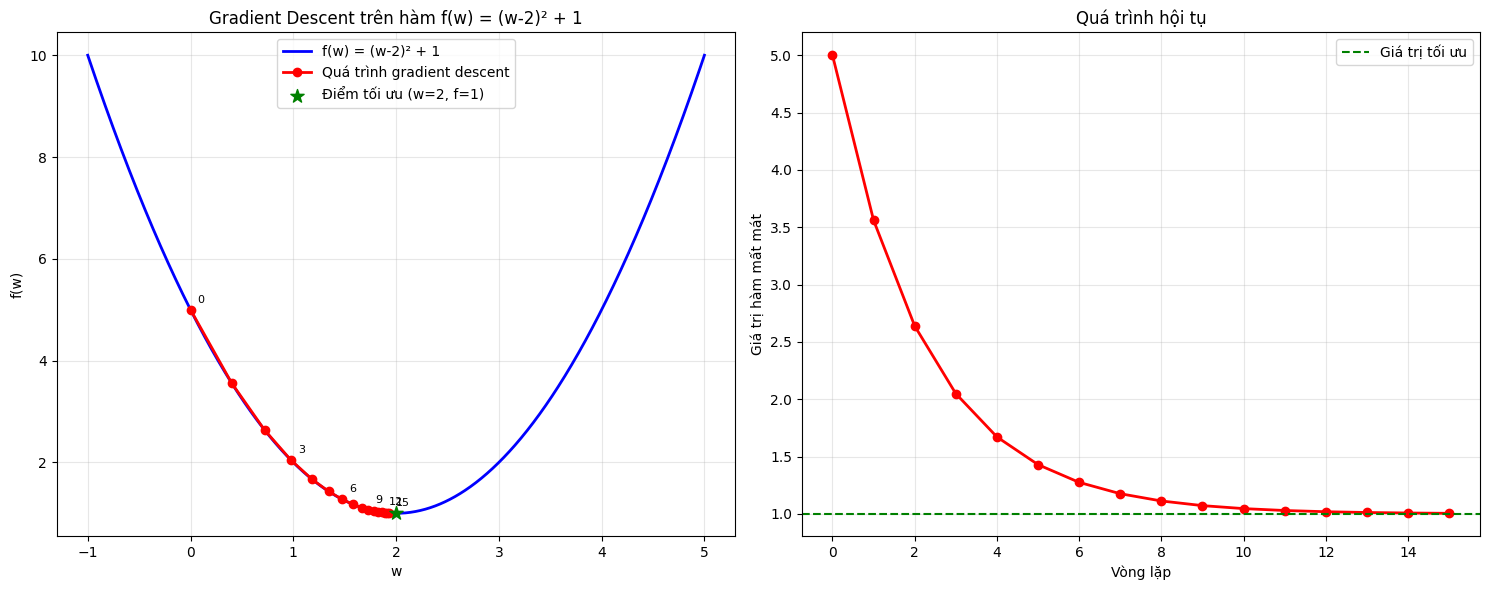

In [7]:
class GradientDescentVisualization:
    """
    L·ªõp minh h·ªça thu·∫≠t to√°n Gradient Descent
    - M·ª•c ƒë√≠ch: T·∫°o m·ªôt m√¥i tr∆∞·ªùng ƒë·ªÉ ch·∫°y v√† tr·ª±c quan h√≥a qu√° tr√¨nh t·ªëi ∆∞u h√≥a b·∫±ng Gradient Descent
    - ·ª®ng d·ª•ng: Gi√∫p hi·ªÉu c√°ch thu·∫≠t to√°n t√¨m ƒëi·ªÉm t·ªëi ∆∞u c·ªßa h√†m m·∫•t m√°t, n·ªÅn t·∫£ng cho nhi·ªÅu m√¥ h√¨nh h·ªçc m√°y
    """
    
    def __init__(self):
        # Kh·ªüi t·∫°o danh s√°ch ƒë·ªÉ l∆∞u l·ªãch s·ª≠ c√°c gi√° tr·ªã w v√† f(w) trong qu√° tr√¨nh t·ªëi ∆∞u
        # ·ª®ng d·ª•ng: L·ªãch s·ª≠ n√†y ƒë∆∞·ª£c d√πng ƒë·ªÉ tr·ª±c quan h√≥a ƒë∆∞·ªùng ƒëi c·ªßa thu·∫≠t to√°n
        self.history = []
    
    def ham_mat_mat_don_gian(self, w):
        """
        H√†m m·∫•t m√°t ƒë∆°n gi·∫£n: f(w) = (w - 2)¬≤ + 1
        - ƒê√¢y l√† m·ªôt h√†m b·∫≠c hai v·ªõi c·ª±c ti·ªÉu t·∫°i w = 2, f(w) = 1
        - L√Ω do ch·ªçn h√†m n√†y: D·ªÖ t√≠nh to√°n, c√≥ m·ªôt ƒëi·ªÉm t·ªëi ∆∞u r√µ r√†ng, ph√π h·ª£p ƒë·ªÉ minh h·ªça
        - ·ª®ng d·ª•ng: ƒê·∫°i di·ªán cho c√°c h√†m m·∫•t m√°t trong h·ªçc m√°y, n∆°i m·ª•c ti√™u l√† t√¨m tham s·ªë t·ªëi ∆∞u
        """
        return (w - 2)**2 + 1
    
    def dao_ham_don_gian(self, w):
        """
        ƒê·∫°o h√†m c·ªßa h√†m m·∫•t m√°t: f'(w) = 2(w - 2)
        - ƒê·∫°o h√†m cho bi·∫øt ƒë·ªô d·ªëc c·ªßa h√†m t·∫°i ƒëi·ªÉm w, h∆∞·ªõng d·∫´n h∆∞·ªõng di chuy·ªÉn c·ªßa Gradient Descent
        - ·ª®ng d·ª•ng: Gradient (ƒë·ªô d·ªëc) l√† y·∫øu t·ªë c·ªët l√µi ƒë·ªÉ c·∫≠p nh·∫≠t tham s·ªë trong c√°c m√¥ h√¨nh h·ªçc m√°y
        """
        return 2 * (w - 2)
    
    def gradient_descent_don_gian(self, w_start=0, learning_rate=0.1, n_iterations=20):
        """
        Th·ª±c hi·ªán thu·∫≠t to√°n Gradient Descent cho h√†m m·ªôt bi·∫øn
        - w_start: Gi√° tr·ªã kh·ªüi t·∫°o cho tham s·ªë w
        - learning_rate: T·ªëc ƒë·ªô h·ªçc, quy·∫øt ƒë·ªãnh k√≠ch th∆∞·ªõc b∆∞·ªõc di chuy·ªÉn m·ªói l·∫ßn l·∫∑p
        - n_iterations: S·ªë l·∫ßn l·∫∑p t·ªëi ƒëa
        - ·ª®ng d·ª•ng: T√¨m gi√° tr·ªã w t·ªëi ∆∞u h√≥a h√†m m·∫•t m√°t, m√¥ ph·ªèng vi·ªác hu·∫•n luy·ªán m√¥ h√¨nh h·ªçc m√°y
        """
        print(f"=== GRADIENT DESCENT ƒê∆†N GI·∫¢N ===")
        print(f"B·∫Øt ƒë·∫ßu t·∫°i w = {w_start}")
        print(f"T·ª∑ l·ªá h·ªçc (learning rate) = {learning_rate}")
        print()
        
        # Kh·ªüi t·∫°o tham s·ªë w t·∫°i ƒëi·ªÉm b·∫Øt ƒë·∫ßu
        w = w_start
        # L∆∞u gi√° tr·ªã ban ƒë·∫ßu v√†o l·ªãch s·ª≠ (w, f(w)) ƒë·ªÉ theo d√µi
        self.history = [(w, self.ham_mat_mat_don_gian(w))]
        
        # In ti√™u ƒë·ªÅ b·∫£ng ƒë·ªÉ theo d√µi gi√° tr·ªã w, f(w), gradient v√† b∆∞·ªõc c·∫≠p nh·∫≠t
        print("V√≤ng l·∫∑p | w        | f(w)     | f'(w)    | B∆∞·ªõc ti·∫øp theo")
        print("-" * 60)
        
        # V√≤ng l·∫∑p ch√≠nh c·ªßa Gradient Descent
        for i in range(n_iterations):
            # T√≠nh gradient (ƒë·ªô d·ªëc) t·∫°i ƒëi·ªÉm hi·ªán t·∫°i
            gradient = self.dao_ham_don_gian(w)
            
            # T√≠nh gi√° tr·ªã h√†m m·∫•t m√°t t·∫°i ƒëi·ªÉm hi·ªán t·∫°i
            loss = self.ham_mat_mat_don_gian(w)
            
            # In th√¥ng tin chi ti·∫øt c·ªßa v√≤ng l·∫∑p
            print(f"{i:8d} | {w:8.4f} | {loss:8.4f} | {gradient:8.4f} | ", end="")
            
            # C·∫≠p nh·∫≠t tham s·ªë w theo c√¥ng th·ª©c: w_new = w - learning_rate * gradient
            # - Di chuy·ªÉn ng∆∞·ª£c h∆∞·ªõng gradient ƒë·ªÉ gi·∫£m gi√° tr·ªã h√†m m·∫•t m√°t
            # - ·ª®ng d·ª•ng: C√¥ng th·ª©c n√†y l√† n·ªÅn t·∫£ng cho vi·ªác t·ªëi ∆∞u h√≥a tham s·ªë trong h·ªçc m√°y
            w_new = w - learning_rate * gradient
            print(f"w = {w:.4f} - {learning_rate} √ó {gradient:.4f} = {w_new:.4f}")
            
            # C·∫≠p nh·∫≠t w v√† l∆∞u v√†o l·ªãch s·ª≠ ƒë·ªÉ tr·ª±c quan h√≥a
            w = w_new
            self.history.append((w, self.ham_mat_mat_don_gian(w)))
            
            # Ki·ªÉm tra ƒëi·ªÅu ki·ªán d·ª´ng: n·∫øu gradient nh·ªè h∆°n ng∆∞·ª°ng 1e-6, coi nh∆∞ h·ªôi t·ª•
            # - ·ª®ng d·ª•ng: NgƒÉn thu·∫≠t to√°n ch·∫°y kh√¥ng c·∫ßn thi·∫øt khi ƒë√£ g·∫ßn ƒëi·ªÉm t·ªëi ∆∞u
            if abs(gradient) < 1e-6:
                print(f"H·ªôi t·ª• t·∫°i v√≤ng l·∫∑p {i+1}")
                break
        
        # In k·∫øt qu·∫£ cu·ªëi c√πng v√† so s√°nh v·ªõi gi√° tr·ªã t·ªëi ∆∞u l√Ω thuy·∫øt (w = 2)
        print(f"\nK·∫øt qu·∫£ cu·ªëi c√πng: w = {w:.6f}")
        print(f"Gi√° tr·ªã t·ªëi ∆∞u l√Ω thuy·∫øt: w = 2.000000")
        print(f"Sai s·ªë: {abs(w - 2):.6f}")
        
        return w
    
    def visualize_gradient_descent(self):
        """
        Tr·ª±c quan h√≥a qu√° tr√¨nh Gradient Descent b·∫±ng hai bi·ªÉu ƒë·ªì:
        1. Bi·ªÉu ƒë·ªì h√†m m·∫•t m√°t v√† ƒë∆∞·ªùng ƒëi c·ªßa thu·∫≠t to√°n
        2. Bi·ªÉu ƒë·ªì h·ªôi t·ª• c·ªßa gi√° tr·ªã h√†m m·∫•t m√°t qua c√°c v√≤ng l·∫∑p
        - ·ª®ng d·ª•ng: Gi√∫p ng∆∞·ªùi h·ªçc hi·ªÉu tr·ª±c quan c√°ch Gradient Descent ho·∫°t ƒë·ªông
        """
        # T·∫°o m·∫£ng w ƒë·ªÉ v·∫Ω h√†m m·∫•t m√°t (t·ª´ -1 ƒë·∫øn 5, 1000 ƒëi·ªÉm)
        w_range = np.linspace(-1, 5, 1000)
        loss_range = [self.ham_mat_mat_don_gian(w) for w in w_range]  # T√≠nh f(w) cho t·ª´ng w
        
        # T√°ch l·ªãch s·ª≠ th√†nh danh s√°ch w v√† f(w) ƒë·ªÉ v·∫Ω
        w_history = [point[0] for point in self.history]
        loss_history = [point[1] for point in self.history]
        
        # T·∫°o figure v·ªõi hai bi·ªÉu ƒë·ªì c·∫°nh nhau
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))
        
        # Bi·ªÉu ƒë·ªì 1: H√†m m·∫•t m√°t v√† ƒë∆∞·ªùng ƒëi c·ªßa Gradient Descent
        # - V·∫Ω h√†m m·∫•t m√°t f(w) = (w-2)¬≤ + 1
        axes[0].plot(w_range, loss_range, 'b-', linewidth=2, label='f(w) = (w-2)¬≤ + 1')
        # - V·∫Ω ƒë∆∞·ªùng ƒëi c·ªßa w qua c√°c v√≤ng l·∫∑p (ƒëi·ªÉm ƒë·ªè n·ªëi b·∫±ng ƒë∆∞·ªùng)
        axes[0].plot(w_history, loss_history, 'ro-', markersize=6, linewidth=2, 
                     label='Qu√° tr√¨nh gradient descent')
        # - ƒê√°nh d·∫•u ƒëi·ªÉm t·ªëi ∆∞u l√Ω thuy·∫øt (w=2, f(w)=1) b·∫±ng d·∫•u sao xanh
        axes[0].scatter(2, 1, color='green', s=100, marker='*', 
                       label='ƒêi·ªÉm t·ªëi ∆∞u (w=2, f=1)', zorder=5)
        
        # ƒê√°nh s·ªë c√°c b∆∞·ªõc (m·ªói 3 b∆∞·ªõc ƒë·ªÉ tr√°nh r·ªëi)
        # - ·ª®ng d·ª•ng: Gi√∫p theo d√µi th·ª© t·ª± c√°c ƒëi·ªÉm trong qu√° tr√¨nh t·ªëi ∆∞u
        for i, (w, loss) in enumerate(self.history[::3]):  
            axes[0].annotate(f'{i*3}', (w, loss), xytext=(5, 5), 
                           textcoords='offset points', fontsize=8)
        
        # C·∫•u h√¨nh bi·ªÉu ƒë·ªì 1
        axes[0].set_xlabel('w')
        axes[0].set_ylabel('f(w)')
        axes[0].set_title('Gradient Descent tr√™n h√†m f(w) = (w-2)¬≤ + 1')
        axes[0].legend()
        axes[0].grid(True, alpha=0.3)
        
        # Bi·ªÉu ƒë·ªì 2: H·ªôi t·ª• c·ªßa gi√° tr·ªã h√†m m·∫•t m√°t
        # - V·∫Ω gi√° tr·ªã f(w) qua c√°c v√≤ng l·∫∑p
        axes[1].plot(range(len(loss_history)), loss_history, 'r-', linewidth=2, marker='o')
        # - V·∫Ω ƒë∆∞·ªùng ngang t·∫°i gi√° tr·ªã t·ªëi ∆∞u l√Ω thuy·∫øt (f(w)=1)
        axes[1].axhline(y=1, color='green', linestyle='--', label='Gi√° tr·ªã t·ªëi ∆∞u')
        # C·∫•u h√¨nh bi·ªÉu ƒë·ªì 2
        axes[1].set_xlabel('V√≤ng l·∫∑p')
        axes[1].set_ylabel('Gi√° tr·ªã h√†m m·∫•t m√°t')
        axes[1].set_title('Qu√° tr√¨nh h·ªôi t·ª•')
        axes[1].legend()
        axes[1].grid(True, alpha=0.3)
        
        # ƒêi·ªÅu ch·ªânh b·ªë c·ª•c v√† hi·ªÉn th·ªã bi·ªÉu ƒë·ªì
        plt.tight_layout()
        plt.show()

# Minh h·ªça thu·∫≠t to√°n
gd_viz = GradientDescentVisualization()  # T·∫°o instance c·ªßa l·ªõp
# Ch·∫°y Gradient Descent v·ªõi w kh·ªüi ƒë·∫ßu = 0, learning rate = 0.1, t·ªëi ƒëa 15 v√≤ng l·∫∑p
w_final = gd_viz.gradient_descent_don_gian(w_start=0, learning_rate=0.1, n_iterations=15)
# Tr·ª±c quan h√≥a k·∫øt qu·∫£
gd_viz.visualize_gradient_descent()

=== ·∫¢NH H∆Ø·ªûNG C·ª¶A LEARNING RATE ===

Learning rate = 0.01:
  S·ªë b∆∞·ªõc ƒë·ªÉ h·ªôi t·ª•: 20
  w cu·ªëi c√πng: 0.664784
  Sai s·ªë: 1.335216

Learning rate = 0.1:
  S·ªë b∆∞·ªõc ƒë·ªÉ h·ªôi t·ª•: 20
  w cu·ªëi c√πng: 1.976942
  Sai s·ªë: 0.023058

Learning rate = 0.5:
  S·ªë b∆∞·ªõc ƒë·ªÉ h·ªôi t·ª•: 2
  w cu·ªëi c√πng: 2.000000
  Sai s·ªë: 0.000000

Learning rate = 0.9:
  S·ªë b∆∞·ªõc ƒë·ªÉ h·ªôi t·ª•: 20
  w cu·ªëi c√πng: 1.976942
  Sai s·ªë: 0.023058


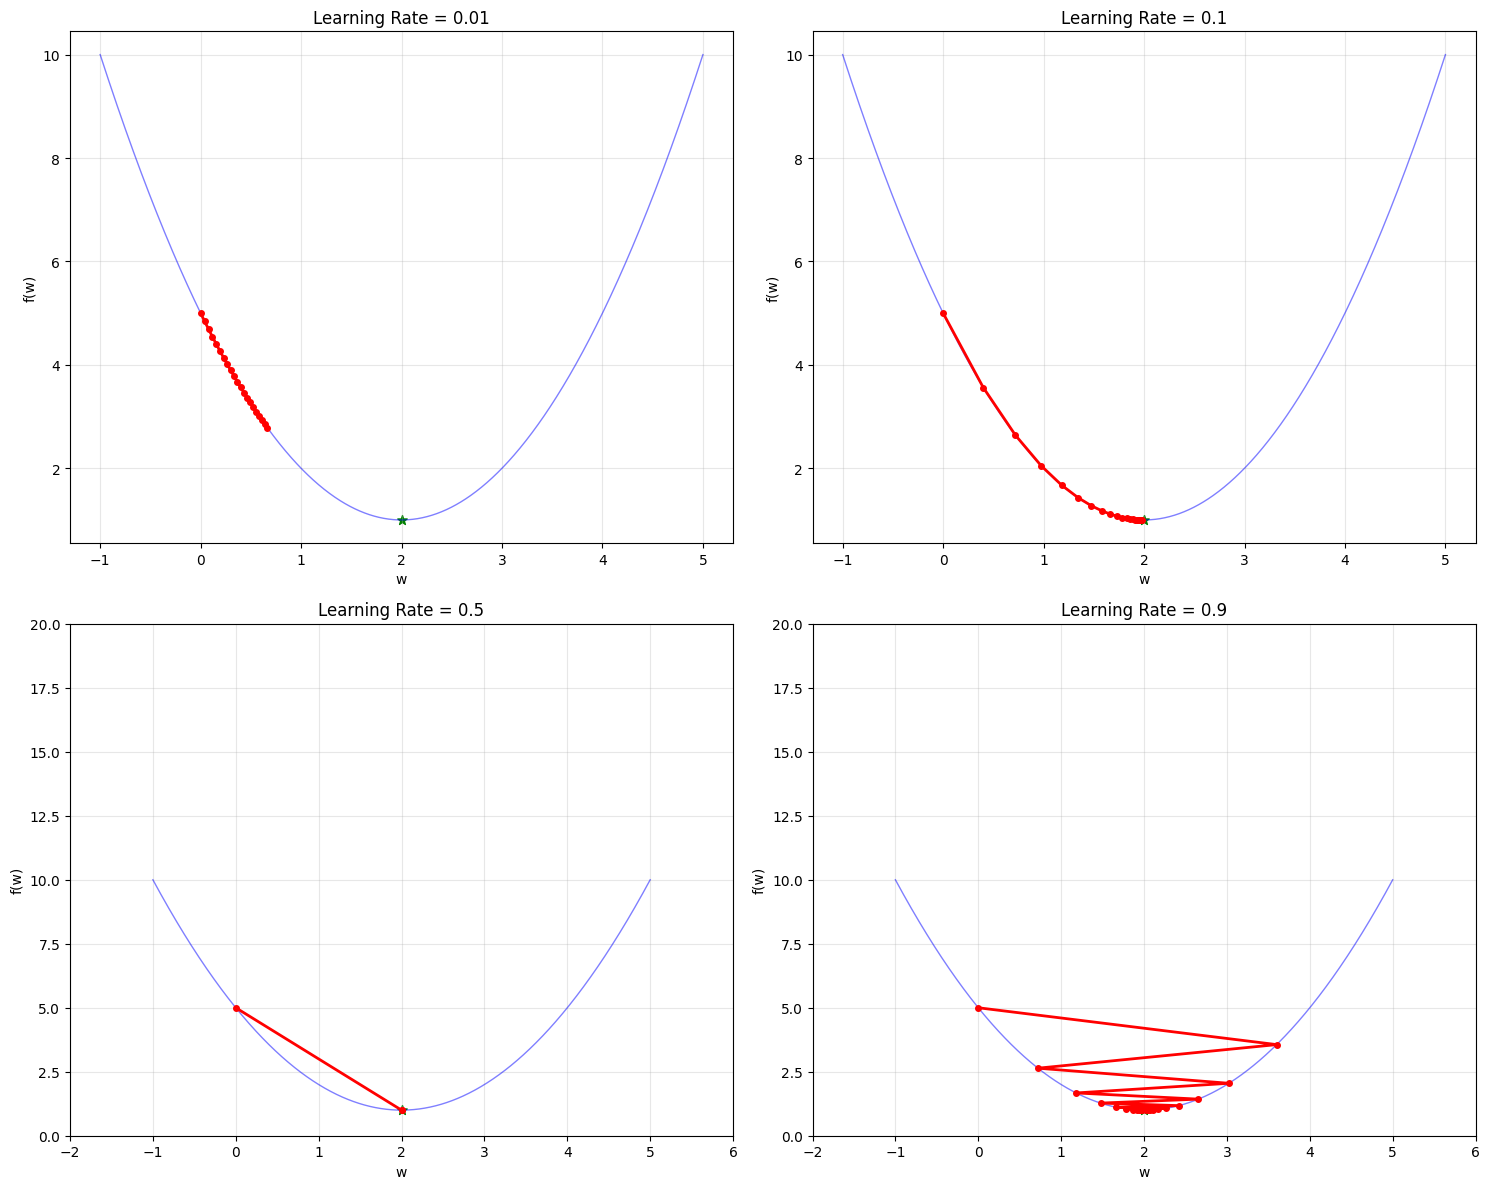

In [8]:
# Gi·∫£ s·ª≠ l·ªõp GradientDescentVisualization ƒë√£ ƒë∆∞·ª£c ƒë·ªãnh nghƒ©a tr∆∞·ªõc ƒë√≥
# (Ch·ª©a c√°c ph∆∞∆°ng th·ª©c ham_mat_mat_don_gian v√† dao_ham_don_gian nh∆∞ trong code tr∆∞·ªõc)

def so_sanh_learning_rate():
    """
    So s√°nh ·∫£nh h∆∞·ªüng c·ªßa c√°c learning rate kh√°c nhau trong Gradient Descent
    - M·ª•c ƒë√≠ch: Minh h·ªça c√°ch learning rate ·∫£nh h∆∞·ªüng ƒë·∫øn t·ªëc ƒë·ªô h·ªôi t·ª• v√† t√≠nh ·ªïn ƒë·ªãnh
    - ·ª®ng d·ª•ng: Gi√∫p hi·ªÉu c√°ch ch·ªçn learning rate ph√π h·ª£p trong c√°c b√†i to√°n h·ªçc m√°y
    """
    print("=== ·∫¢NH H∆Ø·ªûNG C·ª¶A LEARNING RATE ===")
    
    # T·∫°o instance c·ªßa l·ªõp GradientDescentVisualization ƒë·ªÉ s·ª≠ d·ª•ng c√°c h√†m m·∫•t m√°t v√† ƒë·∫°o h√†m
    gd = GradientDescentVisualization()
    
    # Danh s√°ch c√°c gi√° tr·ªã learning rate ƒë·ªÉ so s√°nh
    # - C√°c gi√° tr·ªã t·ª´ nh·ªè (0.01) ƒë·∫øn l·ªõn (0.9) ƒë·ªÉ quan s√°t hi·ªáu ·ª©ng kh√°c nhau
    learning_rates = [0.01, 0.1, 0.5, 0.9]
    
    # T·∫°o figure v·ªõi 4 bi·ªÉu ƒë·ªì con (2x2) ƒë·ªÉ hi·ªÉn th·ªã k·∫øt qu·∫£ cho t·ª´ng learning rate
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    axes = axes.flatten()  # Chuy·ªÉn ma tr·∫≠n 2x2 th√†nh m·∫£ng 1D ƒë·ªÉ d·ªÖ l·∫≠p tr√¨nh
    
    # T·∫°o d·ªØ li·ªáu ƒë·ªÉ v·∫Ω h√†m m·∫•t m√°t f(w) = (w-2)¬≤ + 1
    w_range = np.linspace(-1, 5, 1000)  # T·∫°o 1000 ƒëi·ªÉm t·ª´ -1 ƒë·∫øn 5
    loss_range = [gd.ham_mat_mat_don_gian(w) for w in w_range]  # T√≠nh f(w) cho t·ª´ng ƒëi·ªÉm
    
    # L·∫∑p qua t·ª´ng learning rate
    for i, lr in enumerate(learning_rates):
        print(f"\nLearning rate = {lr}:")
        
        # Kh·ªüi t·∫°o tham s·ªë w t·∫°i ƒëi·ªÉm b·∫Øt ƒë·∫ßu (w = 0)
        w = 0
        # L∆∞u l·ªãch s·ª≠ (w, f(w)) ƒë·ªÉ theo d√µi qu√° tr√¨nh t·ªëi ∆∞u
        history = [(w, gd.ham_mat_mat_don_gian(w))]
        
        # Ch·∫°y Gradient Descent v·ªõi t·ªëi ƒëa 20 v√≤ng l·∫∑p
        for step in range(20):
            # T√≠nh gradient (ƒë·ªô d·ªëc) t·∫°i ƒëi·ªÉm hi·ªán t·∫°i
            gradient = gd.dao_ham_don_gian(w)
            # C·∫≠p nh·∫≠t w theo c√¥ng th·ª©c: w_new = w - learning_rate * gradient
            w = w - lr * gradient
            # L∆∞u gi√° tr·ªã m·ªõi v√†o l·ªãch s·ª≠
            history.append((w, gd.ham_mat_mat_don_gian(w)))
            
            # Ki·ªÉm tra ƒëi·ªÅu ki·ªán d·ª´ng: n·∫øu gradient nh·ªè h∆°n ng∆∞·ª°ng 1e-6, coi nh∆∞ h·ªôi t·ª•
            # - ·ª®ng d·ª•ng: NgƒÉn thu·∫≠t to√°n ch·∫°y kh√¥ng c·∫ßn thi·∫øt khi ƒë√£ ƒë·∫°t ƒëi·ªÉm t·ªëi ∆∞u
            if abs(gradient) < 1e-6:
                break
        
        # T√°ch l·ªãch s·ª≠ th√†nh danh s√°ch w v√† f(w) ƒë·ªÉ v·∫Ω bi·ªÉu ƒë·ªì
        w_history = [point[0] for point in history]
        loss_history = [point[1] for point in history]
        
        # In k·∫øt qu·∫£ cho learning rate hi·ªán t·∫°i
        print(f"  S·ªë b∆∞·ªõc ƒë·ªÉ h·ªôi t·ª•: {len(history)-1}")
        print(f"  w cu·ªëi c√πng: {w:.6f}")
        print(f"  Sai s·ªë: {abs(w - 2):.6f}")
        
        # V·∫Ω bi·ªÉu ƒë·ªì cho learning rate hi·ªán t·∫°i
        # - V·∫Ω h√†m m·∫•t m√°t f(w) = (w-2)¬≤ + 1 (ƒë∆∞·ªùng m√†u xanh lam)
        axes[i].plot(w_range, loss_range, 'b-', linewidth=1, alpha=0.5)
        # - V·∫Ω ƒë∆∞·ªùng ƒëi c·ªßa w qua c√°c v√≤ng l·∫∑p (ƒëi·ªÉm ƒë·ªè n·ªëi b·∫±ng ƒë∆∞·ªùng)
        axes[i].plot(w_history, loss_history, 'ro-', markersize=4, linewidth=2)
        # - ƒê√°nh d·∫•u ƒëi·ªÉm t·ªëi ∆∞u l√Ω thuy·∫øt (w=2, f(w)=1) b·∫±ng d·∫•u sao xanh
        axes[i].scatter(2, 1, color='green', s=50, marker='*')
        # - ƒê·∫∑t ti√™u ƒë·ªÅ v√† nh√£n tr·ª•c
        axes[i].set_title(f'Learning Rate = {lr}')
        axes[i].set_xlabel('w')
        axes[i].set_ylabel('f(w)')
        axes[i].grid(True, alpha=0.3)
        
        # ƒêi·ªÅu ch·ªânh gi·ªõi h·∫°n tr·ª•c cho c√°c learning rate l·ªõn (0.5, 0.9)
        # - L√Ω do: Learning rate l·ªõn c√≥ th·ªÉ khi·∫øn w dao ƒë·ªông m·∫°nh, c·∫ßn m·ªü r·ªông tr·ª•c ƒë·ªÉ th·∫•y r√µ
        if lr >= 0.5:
            axes[i].set_xlim(-2, 6)
            axes[i].set_ylim(0, 20)
    
    # ƒêi·ªÅu ch·ªânh b·ªë c·ª•c v√† hi·ªÉn th·ªã bi·ªÉu ƒë·ªì
    plt.tight_layout()
    plt.show()

# G·ªçi h√†m ƒë·ªÉ ch·∫°y minh h·ªça
so_sanh_learning_rate()

=== KI·ªÇM TRA L·ªöP H·ªíI QUY TUY·∫æN T√çNH ===
D·ªØ li·ªáu test: (100, 1), m·ªëi quan h·ªá th·∫≠t: y = 3x + 2 + noise
Kh·ªüi t·∫°o tr·ªçng s·ªë: [0.00013002 0.01453534]

=== B·∫ÆT ƒê·∫¶U HU·∫§N LUY·ªÜN ===
D·ªØ li·ªáu: 100 m·∫´u, 1 ƒë·∫∑c tr∆∞ng
Learning rate: 0.01
S·ªë v√≤ng l·∫∑p t·ªëi ƒëa: 1000

V√≤ng l·∫∑p | MSE      | Thay ƒë·ªïi MSE
----------------------------------------
       0 | 372.294987 | +inf
       1 | 156.855910 | +215.439077
       2 | 66.573431 | +90.282479
       3 | 28.738543 | +37.834888
       4 | 12.882123 | +15.856421
       5 | 6.235910 | +6.646213
       6 | 3.449293 | +2.786617
       7 | 2.280067 | +1.169225
       8 | 1.788625 | +0.491442
       9 | 1.581217 | +0.207408
     100 | 1.241034 | +0.340184
     200 | 1.096966 | +0.144068
     300 | 1.000672 | +0.096294
     400 | 0.936311 | +0.064362
     500 | 0.893292 | +0.043019
     600 | 0.864539 | +0.028753
     700 | 0.845321 | +0.019218
     800 | 0.832475 | +0.012845
     900 | 0.823890 | +0.008586



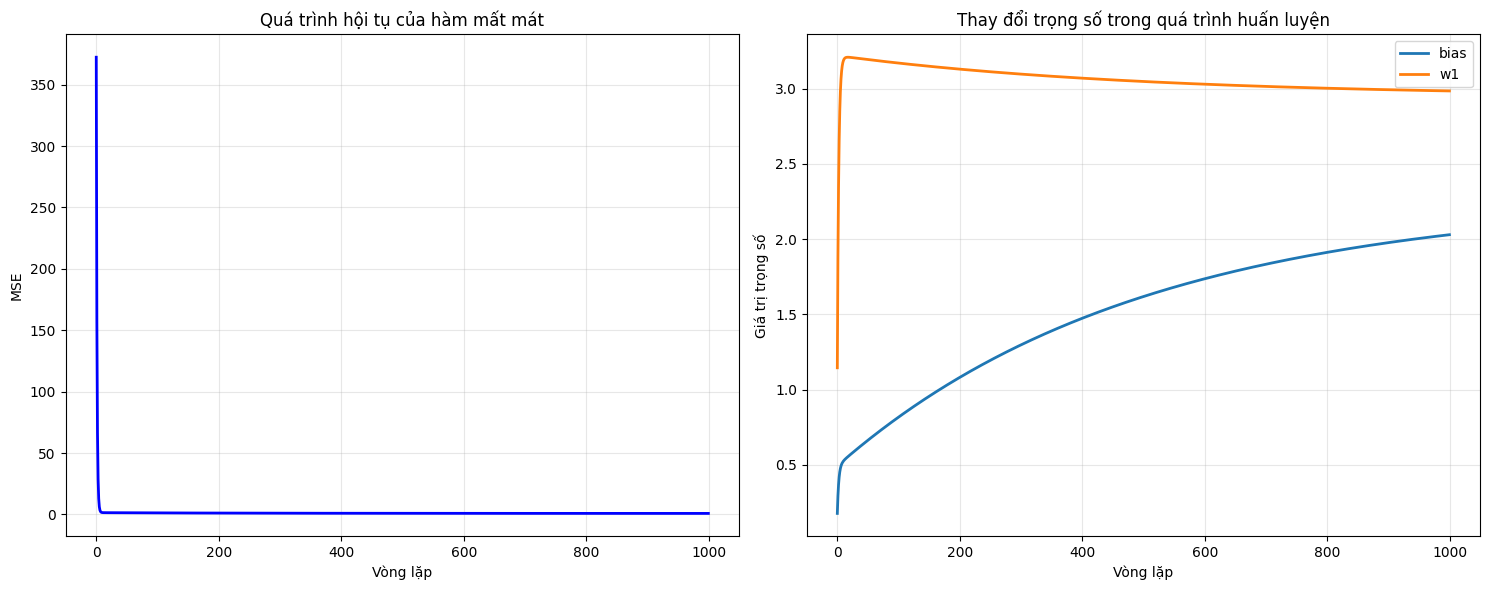

In [9]:
class HoiQuyTuyenTinhTuDau:
    """
    L·ªõp h·ªìi quy tuy·∫øn t√≠nh ƒë∆∞·ª£c x√¢y d·ª±ng t·ª´ ƒë·∫ßu s·ª≠ d·ª•ng Gradient Descent
    - M·ª•c ƒë√≠ch: Tri·ªÉn khai m√¥ h√¨nh h·ªìi quy tuy·∫øn t√≠nh ƒë·ªÉ d·ª± ƒëo√°n gi√° tr·ªã li√™n t·ª•c
    - ·ª®ng d·ª•ng: Minh h·ªça c√°ch hu·∫•n luy·ªán m√¥ h√¨nh h·ªçc m√°y c∆° b·∫£n v·ªõi Gradient Descent
    """
    
    def __init__(self, learning_rate=0.01, n_iterations=1000, fit_intercept=True):
        """
        Kh·ªüi t·∫°o m√¥ h√¨nh h·ªìi quy tuy·∫øn t√≠nh
        - learning_rate: T·ª∑ l·ªá h·ªçc cho Gradient Descent, ki·ªÉm so√°t k√≠ch th∆∞·ªõc b∆∞·ªõc c·∫≠p nh·∫≠t
        - n_iterations: S·ªë v√≤ng l·∫∑p t·ªëi ƒëa ƒë·ªÉ hu·∫•n luy·ªán
        - fit_intercept: Quy·∫øt ƒë·ªãnh c√≥ th√™m bias (h·ªá s·ªë ch·∫∑n) v√†o m√¥ h√¨nh hay kh√¥ng
        - ·ª®ng d·ª•ng: C√°c tham s·ªë n√†y cho ph√©p t√πy ch·ªânh m√¥ h√¨nh ph√π h·ª£p v·ªõi b√†i to√°n
        """
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.fit_intercept = fit_intercept
        
        # L∆∞u tr·ªØ l·ªãch s·ª≠ hu·∫•n luy·ªán ƒë·ªÉ theo d√µi qu√° tr√¨nh t·ªëi ∆∞u
        self.cost_history = []  # L∆∞u gi√° tr·ªã h√†m m·∫•t m√°t (MSE) qua c√°c v√≤ng l·∫∑p
        self.weights_history = []  # L∆∞u gi√° tr·ªã tr·ªçng s·ªë qua c√°c v√≤ng l·∫∑p
        
        # Tham s·ªë m√¥ h√¨nh
        self.weights = None  # Tr·ªçng s·ªë (bao g·ªìm c·∫£ bias n·∫øu fit_intercept=True)
        self.bias = None  # Kh√¥ng s·ª≠ d·ª•ng ri√™ng, t√≠ch h·ª£p trong weights
        
        # Th√¥ng tin v·ªÅ d·ªØ li·ªáu
        self.n_samples = None  # S·ªë m·∫´u
        self.n_features = None  # S·ªë ƒë·∫∑c tr∆∞ng
    
    def _them_bias_vao_X(self, X):
        """
        Th√™m c·ªôt bias (to√†n s·ªë 1) v√†o ma tr·∫≠n ƒë·∫∑c tr∆∞ng X
        - N·∫øu fit_intercept=True, th√™m c·ªôt 1 ƒë·ªÉ t√≠nh bias trong m√¥ h√¨nh (y = w‚ÇÄ + w‚ÇÅx‚ÇÅ + ...)
        - ·ª®ng d·ª•ng: Cho ph√©p m√¥ h√¨nh h·ªçc h·ªá s·ªë ch·∫∑n (bias) nh∆∞ m·ªôt ph·∫ßn c·ªßa tr·ªçng s·ªë
        """
        if self.fit_intercept:
            bias_column = np.ones((X.shape[0], 1))  # T·∫°o c·ªôt to√†n 1
            return np.concatenate([bias_column, X], axis=1)  # Gh√©p c·ªôt bias v√†o X
        return X
    
    def _khoi_tao_tham_so(self, n_features):
        """
        Kh·ªüi t·∫°o tr·ªçng s·ªë ng·∫´u nhi√™n
        - T·∫°o tr·ªçng s·ªë v·ªõi gi√° tr·ªã nh·ªè ng·∫´u nhi√™n theo ph√¢n ph·ªëi chu·∫©n (mean=0, std=0.01)
        - N·∫øu fit_intercept=True, th√™m m·ªôt tr·ªçng s·ªë cho bias
        - ·ª®ng d·ª•ng: Kh·ªüi t·∫°o ng·∫´u nhi√™n gi√∫p tr√°nh bias ban ƒë·∫ßu v√† b·∫Øt ƒë·∫ßu qu√° tr√¨nh t·ªëi ∆∞u
        """
        if self.fit_intercept:
            self.weights = np.random.normal(0, 0.01, n_features + 1)  # Bao g·ªìm bias
        else:
            self.weights = np.random.normal(0, 0.01, n_features)  # Kh√¥ng bao g·ªìm bias
        print(f"Kh·ªüi t·∫°o tr·ªçng s·ªë: {self.weights}")
    
    def _tinh_du_doan(self, X):
        """
        T√≠nh d·ª± ƒëo√°n: y = X @ weights
        - X: Ma tr·∫≠n ƒë·∫∑c tr∆∞ng (c√≥ th√™m c·ªôt bias n·∫øu fit_intercept=True)
        - weights: Vector tr·ªçng s·ªë (bao g·ªìm bias n·∫øu c√≥)
        - ·ª®ng d·ª•ng: T√≠nh gi√° tr·ªã d·ª± ƒëo√°n d·ª±a tr√™n m√¥ h√¨nh tuy·∫øn t√≠nh
        """
        X_with_bias = self._them_bias_vao_X(X)
        return X_with_bias @ self.weights  # Ph√©p nh√¢n ma tr·∫≠n
    
    def _tinh_ham_mat_mat(self, y_true, y_pred):
        """
        T√≠nh h√†m m·∫•t m√°t Mean Squared Error (MSE)
        - MSE = (1/n) * Œ£(y_true - y_pred)¬≤
        - ·ª®ng d·ª•ng: ƒê√°nh gi√° m·ª©c ƒë·ªô sai l·ªách gi·ªØa d·ª± ƒëo√°n v√† gi√° tr·ªã th·ª±c
        """
        return np.mean((y_true - y_pred) ** 2)
    
    def _tinh_gradient(self, X, y_true, y_pred):
        """
        T√≠nh gradient c·ªßa h√†m m·∫•t m√°t MSE
        - Gradient = (1/m) * X^T * (y_pred - y_true), v·ªõi m l√† s·ªë m·∫´u
        - ·ª®ng d·ª•ng: Gradient ch·ªâ h∆∞·ªõng v√† ƒë·ªô l·ªõn c·∫ßn c·∫≠p nh·∫≠t tr·ªçng s·ªë ƒë·ªÉ gi·∫£m MSE
        """
        X_with_bias = self._them_bias_vao_X(X)
        m = X.shape[0]  # S·ªë m·∫´u
        gradient = (1/m) * X_with_bias.T @ (y_pred - y_true)  # C√¥ng th·ª©c gradient
        return gradient
    
    def huan_luyen(self, X, y, verbose=True):
        """
        Hu·∫•n luy·ªán m√¥ h√¨nh s·ª≠ d·ª•ng Gradient Descent
        - X: Ma tr·∫≠n ƒë·∫∑c tr∆∞ng
        - y: Vector gi√° tr·ªã m·ª•c ti√™u
        - verbose: In ti·∫øn tr√¨nh hu·∫•n luy·ªán n·∫øu True
        - ·ª®ng d·ª•ng: T·ªëi ∆∞u h√≥a tr·ªçng s·ªë ƒë·ªÉ gi·∫£m thi·ªÉu h√†m m·∫•t m√°t
        """
        # Chuy·ªÉn ƒë·ªïi d·ªØ li·ªáu th√†nh numpy array ƒë·ªÉ t√≠nh to√°n
        X = np.array(X)
        y = np.array(y)
        
        # L∆∞u th√¥ng tin d·ªØ li·ªáu
        self.n_samples, self.n_features = X.shape
        
        # Kh·ªüi t·∫°o tham s·ªë
        self._khoi_tao_tham_so(self.n_features)
        
        if verbose:
            print(f"\n=== B·∫ÆT ƒê·∫¶U HU·∫§N LUY·ªÜN ===")
            print(f"D·ªØ li·ªáu: {self.n_samples} m·∫´u, {self.n_features} ƒë·∫∑c tr∆∞ng")
            print(f"Learning rate: {self.learning_rate}")
            print(f"S·ªë v√≤ng l·∫∑p t·ªëi ƒëa: {self.n_iterations}")
            print()
            print("V√≤ng l·∫∑p | MSE      | Thay ƒë·ªïi MSE")
            print("-" * 40)
        
        # Kh·ªüi t·∫°o bi·∫øn ƒë·ªÉ theo d√µi h·ªôi t·ª•
        previous_cost = float('inf')
        
        # V√≤ng l·∫∑p Gradient Descent
        for i in range(self.n_iterations):
            # T√≠nh d·ª± ƒëo√°n
            y_pred = self._tinh_du_doan(X)
            
            # T√≠nh h√†m m·∫•t m√°t
            cost = self._tinh_ham_mat_mat(y, y_pred)
            
            # T√≠nh gradient
            gradient = self._tinh_gradient(X, y, y_pred)
            
            # C·∫≠p nh·∫≠t tr·ªçng s·ªë theo c√¥ng th·ª©c: w = w - learning_rate * gradient
            self.weights = self.weights - self.learning_rate * gradient
            
            # L∆∞u l·ªãch s·ª≠ ƒë·ªÉ tr·ª±c quan h√≥a
            self.cost_history.append(cost)
            self.weights_history.append(self.weights.copy())
            
            # In ti·∫øn tr√¨nh m·ªói 100 v√≤ng l·∫∑p ho·∫∑c 10 v√≤ng l·∫∑p ƒë·∫ßu ti√™n
            if verbose and (i % 100 == 0 or i < 10):
                cost_change = previous_cost - cost  # Thay ƒë·ªïi MSE so v·ªõi v√≤ng tr∆∞·ªõc
                print(f"{i:8d} | {cost:8.6f} | {cost_change:+.6f}")
                previous_cost = cost
            
            # Ki·ªÉm tra h·ªôi t·ª•: d·ª´ng n·∫øu thay ƒë·ªïi MSE nh·ªè h∆°n 1e-8
            if i > 0 and abs(self.cost_history[i] - self.cost_history[i-1]) < 1e-8:
                if verbose:
                    print(f"H·ªôi t·ª• t·∫°i v√≤ng l·∫∑p {i}")
                break
        
        if verbose:
            print(f"\n=== HO√ÄN TH√ÄNH HU·∫§N LUY·ªÜN ===")
            if self.fit_intercept:
                print(f"Bias (w‚ÇÄ): {self.weights[0]:.6f}")
                for j in range(1, len(self.weights)):
                    print(f"Tr·ªçng s·ªë {j} (w‚ÇÅ): {self.weights[j]:.6f}")
            else:
                for j in range(len(self.weights)):
                    print(f"Tr·ªçng s·ªë {j+1}: {self.weights[j]:.6f}")
            print(f"MSE cu·ªëi c√πng: {self.cost_history[-1]:.6f}")
    
    def du_doan(self, X):
        """
        D·ª± ƒëo√°n tr√™n d·ªØ li·ªáu m·ªõi
        - ·ª®ng d·ª•ng: S·ª≠ d·ª•ng tr·ªçng s·ªë ƒë√£ hu·∫•n luy·ªán ƒë·ªÉ d·ª± ƒëo√°n gi√° tr·ªã y cho d·ªØ li·ªáu m·ªõi
        """
        if self.weights is None:
            raise ValueError("M√¥ h√¨nh ch∆∞a ƒë∆∞·ª£c hu·∫•n luy·ªán!")  # Ki·ªÉm tra m√¥ h√¨nh ƒë√£ hu·∫•n luy·ªán ch∆∞a
        X = np.array(X)
        return self._tinh_du_doan(X)
    
    def danh_gia(self, X, y):
        """
        ƒê√°nh gi√° m√¥ h√¨nh tr√™n t·∫≠p d·ªØ li·ªáu
        - T√≠nh c√°c ch·ªâ s·ªë: MSE, RMSE, R¬≤
        - ·ª®ng d·ª•ng: ƒê√°nh gi√° ch·∫•t l∆∞·ª£ng m√¥ h√¨nh tr√™n d·ªØ li·ªáu ki·ªÉm tra
        """
        y_pred = self.du_doan(X)
        mse = self._tinh_ham_mat_mat(y, y_pred)
        
        # T√≠nh R¬≤: H·ªá s·ªë x√°c ƒë·ªãnh, ƒëo l∆∞·ªùng m·ª©c ƒë·ªô ph√π h·ª£p c·ªßa m√¥ h√¨nh
        ss_res = np.sum((y - y_pred) ** 2)  # T·ªïng b√¨nh ph∆∞∆°ng sai s·ªë
        ss_tot = np.sum((y - np.mean(y)) ** 2)  # T·ªïng b√¨nh ph∆∞∆°ng t·ªïng
        r2 = 1 - (ss_res / ss_tot)  # R¬≤ = 1 - (SS_res / SS_tot)
        
        return {
            'MSE': mse,
            'RMSE': np.sqrt(mse),  # CƒÉn b·∫≠c hai c·ªßa MSE
            'R¬≤': r2  # H·ªá s·ªë x√°c ƒë·ªãnh
        }
    
    def ve_qua_trinh_huan_luyen(self):
        """
        V·∫Ω bi·ªÉu ƒë·ªì qu√° tr√¨nh hu·∫•n luy·ªán
        - Bi·ªÉu ƒë·ªì 1: S·ª± h·ªôi t·ª• c·ªßa h√†m m·∫•t m√°t (MSE)
        - Bi·ªÉu ƒë·ªì 2: Thay ƒë·ªïi c·ªßa c√°c tr·ªçng s·ªë qua c√°c v√≤ng l·∫∑p
        - ·ª®ng d·ª•ng: Gi√∫p hi·ªÉu tr·ª±c quan qu√° tr√¨nh h·ªçc c·ªßa m√¥ h√¨nh
        """
        if not self.cost_history:
            print("Ch∆∞a c√≥ d·ªØ li·ªáu hu·∫•n luy·ªán ƒë·ªÉ v·∫Ω!")
            return
        
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))
        
        # Bi·ªÉu ƒë·ªì 1: S·ª± h·ªôi t·ª• c·ªßa h√†m m·∫•t m√°t
        axes[0].plot(self.cost_history, 'b-', linewidth=2)
        axes[0].set_xlabel('V√≤ng l·∫∑p')
        axes[0].set_ylabel('MSE')
        axes[0].set_title('Qu√° tr√¨nh h·ªôi t·ª• c·ªßa h√†m m·∫•t m√°t')
        axes[0].grid(True, alpha=0.3)
        
        # Bi·ªÉu ƒë·ªì 2: Thay ƒë·ªïi tr·ªçng s·ªë
        weights_array = np.array(self.weights_history)  # Chuy·ªÉn l·ªãch s·ª≠ tr·ªçng s·ªë th√†nh m·∫£ng
        n_weights_to_show = min(5, weights_array.shape[1])  # Ch·ªâ hi·ªÉn th·ªã t·ªëi ƒëa 5 tr·ªçng s·ªë
        
        for i in range(n_weights_to_show):
            label = f'bias' if i == 0 and self.fit_intercept else f'w{i}'
            axes[1].plot(weights_array[:, i], label=label, linewidth=2)
        
        axes[1].set_xlabel('V√≤ng l·∫∑p')
        axes[1].set_ylabel('Gi√° tr·ªã tr·ªçng s·ªë')
        axes[1].set_title('Thay ƒë·ªïi tr·ªçng s·ªë trong qu√° tr√¨nh hu·∫•n luy·ªán')
        axes[1].legend()
        axes[1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()

# Test l·ªõp v·ªõi d·ªØ li·ªáu ƒë∆°n gi·∫£n
print("=== KI·ªÇM TRA L·ªöP H·ªíI QUY TUY·∫æN T√çNH ===")

# T·∫°o d·ªØ li·ªáu test
np.random.seed(42)  # ƒê·∫∑t seed ƒë·ªÉ k·∫øt qu·∫£ t√°i l·∫≠p
n_samples = 100
X_test = np.random.uniform(1, 10, (n_samples, 1))  # D·ªØ li·ªáu ƒë·∫∑c tr∆∞ng ng·∫´u nhi√™n
y_test = 3 * X_test.flatten() + 2 + np.random.normal(0, 1, n_samples)  # y = 3x + 2 + nhi·ªÖu

print(f"D·ªØ li·ªáu test: {X_test.shape}, m·ªëi quan h·ªá th·∫≠t: y = 3x + 2 + noise")

# T·∫°o v√† hu·∫•n luy·ªán m√¥ h√¨nh
model = HoiQuyTuyenTinhTuDau(learning_rate=0.01, n_iterations=1000)
model.huan_luyen(X_test, y_test)

# ƒê√°nh gi√° m√¥ h√¨nh
results = model.danh_gia(X_test, y_test)
print(f"\nK·∫øt qu·∫£ ƒë√°nh gi√°:")
for metric, value in results.items():
    print(f"{metric}: {value:.6f}")

# V·∫Ω bi·ªÉu ƒë·ªì qu√° tr√¨nh hu·∫•n luy·ªán
model.ve_qua_trinh_huan_luyen()

=== B√ÄI TH·ª∞C H√ÄNH: D·ª∞ ƒêO√ÅN GI√Å NH√Ä BOSTON ===
D·ªØ li·ªáu nh√† ·ªü Boston (m√¥ ph·ªèng):
   ty_le_toi_pham  so_phong_tb  tuoi_nha_phan_tram  khoang_cach_trung_tam  \
0        1.407804     5.375837           33.511885               0.371138   
1        9.030364     7.582021           74.350826               5.102189   
2        3.950237     7.125608           16.075990               1.437125   
3        2.738828     5.971577           81.796702               6.310571   
4        0.508875     5.100806           83.213418               6.076149   

   thue_bat_dong_san    gia_nha  
0         274.948756  50.000000  
1         610.372619  50.000000  
2         303.601849  50.000000  
3         503.585051  47.602112  
4         531.782815  39.449109  

K√≠ch th∆∞·ªõc d·ªØ li·ªáu: (506, 6)

Th·ªëng k√™ m√¥ t·∫£:
       ty_le_toi_pham  so_phong_tb  tuoi_nha_phan_tram  khoang_cach_trung_tam  \
count      506.000000   506.000000          506.000000             506.000000   
mean       

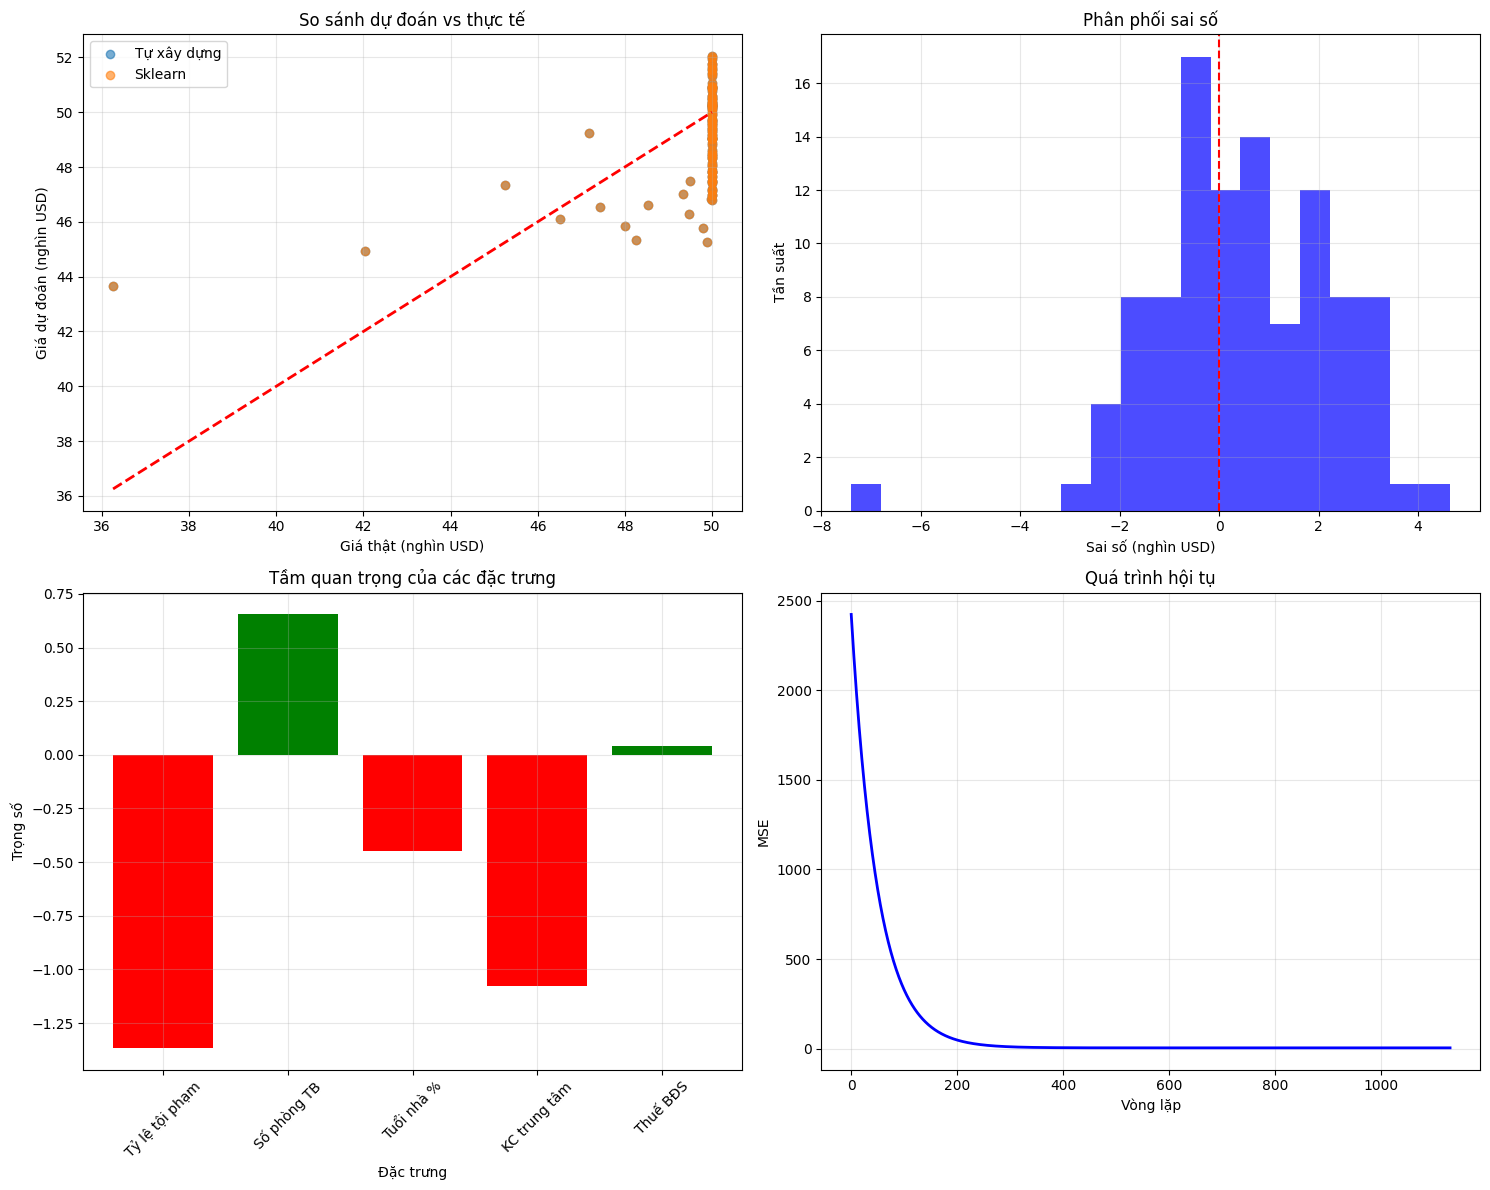

In [10]:
def bai_thuc_hanh_gia_nha_boston():
    """
    B√†i th·ª±c h√†nh d·ª± ƒëo√°n gi√° nh√† Boston
    - M·ª•c ƒë√≠ch: √Åp d·ª•ng m√¥ h√¨nh h·ªìi quy tuy·∫øn t√≠nh t·ª± x√¢y d·ª±ng (HoiQuyTuyenTinhTuDau)
      ƒë·ªÉ d·ª± ƒëo√°n gi√° nh√† d·ª±a tr√™n d·ªØ li·ªáu m√¥ ph·ªèng, minh h·ªça quy tr√¨nh h·ªçc m√°y c∆° b·∫£n.
    - ·ª®ng d·ª•ng: Gi√∫p hi·ªÉu c√°ch hu·∫•n luy·ªán, ƒë√°nh gi√° m√¥ h√¨nh, v√† so s√°nh v·ªõi c√¥ng c·ª•
      chuy√™n nghi·ªáp (scikit-learn), ƒë·ªìng th·ªùi √°p d·ª•ng v√†o b√†i to√°n th·ª±c t·∫ø nh∆∞ d·ª± ƒëo√°n gi√° nh√†.
    - Ki·∫øn th·ª©c li√™n quan: H·ªìi quy tuy·∫øn t√≠nh, Gradient Descent, chu·∫©n h√≥a d·ªØ li·ªáu,
      chia t·∫≠p train/test, ƒë√°nh gi√° m√¥ h√¨nh (MSE, R¬≤).
    """
    print("=== B√ÄI TH·ª∞C H√ÄNH: D·ª∞ ƒêO√ÅN GI√Å NH√Ä BOSTON ===")
    
    # ƒê·∫∑t h·∫°t gi·ªëng ng·∫´u nhi√™n ƒë·ªÉ ƒë·∫£m b·∫£o k·∫øt qu·∫£ t√°i l·∫≠p
    np.random.seed(42)  # H·∫°t gi·ªëng 42 l√† gi√° tr·ªã ph·ªï bi·∫øn ƒë·ªÉ ki·ªÉm so√°t t√≠nh ng·∫´u nhi√™n,
                        # ƒë·∫£m b·∫£o k·∫øt qu·∫£ c√≥ th·ªÉ t√°i hi·ªán cho m·ª•c ƒë√≠ch ki·ªÉm tra
    n_samples = 506  # S·ªë l∆∞·ª£ng m·∫´u, ƒë∆∞·ª£c ch·ªçn d·ª±a tr√™n k√≠ch th∆∞·ªõc th·ª±c t·∫ø c·ªßa dataset Boston Housing
                     # (506 m·∫´u l√† s·ªë m·∫´u g·ªëc trong t·∫≠p d·ªØ li·ªáu Boston Housing)

    # T·∫°o c√°c ƒë·∫∑c tr∆∞ng ng·∫´u nhi√™n ƒë·ªÉ m√¥ ph·ªèng d·ªØ li·ªáu Boston Housing
    # C√°c ƒë·∫∑c tr∆∞ng ƒë∆∞·ª£c sinh t·ª´ c√°c ph√¢n ph·ªëi ph√π h·ª£p v·ªõi ƒë·∫∑c ƒëi·ªÉm th·ª±c t·∫ø
    crime_rate = np.random.exponential(3, n_samples)  # T·ª∑ l·ªá t·ªôi ph·∫°m, ph√¢n ph·ªëi m≈© v·ªõi tham s·ªë 3
    # - Ph√¢n ph·ªëi m≈© m√¥ ph·ªèng d·ªØ li·ªáu l·ªách ph·∫£i (nhi·ªÅu gi√° tr·ªã nh·ªè, √≠t gi√° tr·ªã l·ªõn)
    # - Tham s·ªë 3 ƒëi·ªÅu ch·ªânh t·ª∑ l·ªá trung b√¨nh kho·∫£ng 1/3, ph·∫£n √°nh th·ª±c t·∫ø t·ªôi ph·∫°m th∆∞·ªùng th·∫•p
    room_avg = np.random.normal(6.3, 0.7, n_samples)  # S·ªë ph√≤ng trung b√¨nh
    # - Ph√¢n ph·ªëi chu·∫©n v·ªõi trung b√¨nh 6.3 (d·ª±a tr√™n th·ªëng k√™ Boston Housing)
    # - ƒê·ªô l·ªách chu·∫©n 0.7 ph·∫£n √°nh bi·∫øn ƒë·ªông th·ª±c t·∫ø trong s·ªë ph√≤ng
    age = np.random.uniform(0, 100, n_samples)  # Tu·ªïi nh√† (%)
    # - Ph√¢n ph·ªëi ƒë·ªÅu trong [0, 100] m√¥ ph·ªèng ph·∫ßn trƒÉm tu·ªïi nh√†, ƒë·∫°i di·ªán cho m·ª©c ƒë·ªô c≈© m·ªõi
    distance = np.random.exponential(3, n_samples)  # Kho·∫£ng c√°ch ƒë·∫øn trung t√¢m
    # - Ph√¢n ph·ªëi m≈© v·ªõi tham s·ªë 3, t∆∞∆°ng t·ª± crime_rate, m√¥ ph·ªèng kho·∫£ng c√°ch l·ªách ph·∫£i
    tax_rate = np.random.uniform(150, 700, n_samples)  # Thu·∫ø b·∫•t ƒë·ªông s·∫£n
    # - Ph√¢n ph·ªëi ƒë·ªÅu trong [150, 700] d·ª±a tr√™n ph·∫°m vi thu·∫ø th·ª±c t·∫ø (ngh√¨n USD)
    
    # T·∫°o gi√° nh√† d·ª±a tr√™n logic tuy·∫øn t√≠nh v·ªõi nhi·ªÖu ng·∫´u nhi√™n
    price = (25 - 2*crime_rate + 9*room_avg - 0.1*age - 1.5*distance - 0.01*tax_rate + 
             np.random.normal(0, 3, n_samples))
    # - 25: Gi√° tr·ªã c∆° b·∫£n (intercept), ƒë·∫°i di·ªán cho gi√° kh·ªüi ƒëi·ªÉm khi c√°c y·∫øu t·ªë kh√°c b·∫±ng 0
    # - -2*crime_rate: T·ª∑ l·ªá t·ªôi ph·∫°m gi·∫£m gi√° nh√† (h·ªá s·ªë √¢m, ph·∫£n √°nh t√°c ƒë·ªông ti√™u c·ª±c)
    # - 9*room_avg: S·ªë ph√≤ng tƒÉng gi√° nh√† (h·ªá s·ªë d∆∞∆°ng l·ªõn do ·∫£nh h∆∞·ªüng m·∫°nh m·∫Ω)
    # - -0.1*age: Tu·ªïi nh√† gi·∫£m gi√° (h·ªá s·ªë √¢m nh·ªè, tu·ªïi cao l√†m gi·∫£m gi√° nh·∫π)
    # - -1.5*distance: Kho·∫£ng c√°ch gi·∫£m gi√° (h·ªá s·ªë √¢m, xa trung t√¢m gi·∫£m gi√°)
    # - -0.01*tax_rate: Thu·∫ø gi·∫£m gi√° (h·ªá s·ªë √¢m nh·ªè, thu·∫ø cao l√†m gi·∫£m gi√° nh·∫π)
    # - np.random.normal(0, 3, n_samples): Nhi·ªÖu ng·∫´u nhi√™n v·ªõi trung b√¨nh 0, ƒë·ªô l·ªách chu·∫©n 3
    #   m√¥ ph·ªèng bi·∫øn ƒë·ªông th·ª±c t·∫ø trong gi√° nh√† do c√°c y·∫øu t·ªë kh√¥ng ƒëo l∆∞·ªùng ƒë∆∞·ª£c
    price = np.clip(price, 5, 50)  # Gi·ªõi h·∫°n gi√° trong [5, 50] ngh√¨n USD ƒë·ªÉ tr√°nh gi√° b·∫•t th∆∞·ªùng
    # - np.clip ƒë·∫£m b·∫£o gi√° n·∫±m trong ph·∫°m vi h·ª£p l√Ω d·ª±a tr√™n d·ªØ li·ªáu Boston Housing
    # - K·∫øt lu·∫≠n: M√¥ h√¨nh tuy·∫øn t√≠nh v·ªõi nhi·ªÖu ph·∫£n √°nh m·ªëi quan h·ªá th·ª±c t·∫ø gi·ªØa c√°c ƒë·∫∑c tr∆∞ng v√† gi√° nh√†
    
    # T·∫°o DataFrame ƒë·ªÉ t·ªï ch·ª©c d·ªØ li·ªáu
    data = pd.DataFrame({
        'ty_le_toi_pham': crime_rate,  # C·ªôt 1: T·ª∑ l·ªá t·ªôi ph·∫°m
        'so_phong_tb': room_avg,      # C·ªôt 2: S·ªë ph√≤ng trung b√¨nh
        'tuoi_nha_phan_tram': age,    # C·ªôt 3: Tu·ªïi nh√† (%)
        'khoang_cach_trung_tam': distance,  # C·ªôt 4: Kho·∫£ng c√°ch ƒë·∫øn trung t√¢m
        'thue_bat_dong_san': tax_rate,      # C·ªôt 5: Thu·∫ø b·∫•t ƒë·ªông s·∫£n
        'gia_nha': price                  # C·ªôt 6: Gi√° nh√† (m·ª•c ti√™u)
    })
    
    # In th√¥ng tin c∆° b·∫£n v·ªÅ d·ªØ li·ªáu
    print("D·ªØ li·ªáu nh√† ·ªü Boston (m√¥ ph·ªèng):")
    print(data.head())  # In 5 d√≤ng ƒë·∫ßu ƒë·ªÉ ki·ªÉm tra d·ªØ li·ªáu, gi√∫p ƒë√°nh gi√° ban ƒë·∫ßu
    print(f"\nK√≠ch th∆∞·ªõc d·ªØ li·ªáu: {data.shape}")  # In k√≠ch th∆∞·ªõc (506, 6)
    print(f"\nTh·ªëng k√™ m√¥ t·∫£:")
    print(data.describe())  # In th·ªëng k√™ (min, max, mean, std, etc.) cho t·ª´ng c·ªôt
    # - K·∫øt lu·∫≠n: Th·ªëng k√™ m√¥ t·∫£ cung c·∫•p c√°i nh√¨n t·ªïng quan v·ªÅ ph√¢n ph·ªëi d·ªØ li·ªáu,
    #   gi√∫p x√°c ƒë·ªãnh c·∫ßn chu·∫©n h√≥a hay kh√¥ng
    
    # Chu·∫©n b·ªã d·ªØ li·ªáu cho hu·∫•n luy·ªán
    X = data.drop('gia_nha', axis=1).values  # L·∫•y t·∫•t c·∫£ c·ªôt tr·ª´ 'gia_nha' l√†m ƒë·∫∑c tr∆∞ng
    # - .values chuy·ªÉn DataFrame th√†nh m·∫£ng numpy v·ªõi shape (506, 5)
    y = data['gia_nha'].values  # L·∫•y c·ªôt 'gia_nha' l√†m gi√° tr·ªã m·ª•c ti√™u, shape (506,)
    
    # Chu·∫©n h√≥a ƒë·∫∑c tr∆∞ng ƒë·ªÉ c·∫£i thi·ªán hi·ªáu qu·∫£ Gradient Descent
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()  # T·∫°o ƒë·ªëi t∆∞·ª£ng chu·∫©n h√≥a
    X_scaled = scaler.fit_transform(X)  # Chu·∫©n h√≥a X v·ªÅ trung b√¨nh 0, ƒë·ªô l·ªách chu·∫©n 1
    # - fit_transform t√≠nh trung b√¨nh v√† ƒë·ªô l·ªách chu·∫©n t·ª´ d·ªØ li·ªáu, sau ƒë√≥ √°p d·ª•ng
    # - K·∫øt lu·∫≠n: Chu·∫©n h√≥a ƒë·∫£m b·∫£o Gradient Descent h·ªôi t·ª• nhanh h∆°n,
    #   ƒë·∫∑c bi·ªát v·ªõi c√°c ƒë·∫∑c tr∆∞ng c√≥ thang ƒëo kh√°c nhau (v√≠ d·ª•: crime_rate, tax_rate)
    
    # Chia d·ªØ li·ªáu th√†nh t·∫≠p hu·∫•n luy·ªán v√† t·∫≠p ki·ªÉm tra
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    # - test_size=0.2: 20% d·ªØ li·ªáu (kho·∫£ng 101 m·∫´u) cho t·∫≠p ki·ªÉm tra
    # - 80% (kho·∫£ng 405 m·∫´u) cho t·∫≠p hu·∫•n luy·ªán
    # - random_state=42 ƒë·∫£m b·∫£o t√°i l·∫≠p k·∫øt qu·∫£
    print(f"\nD·ªØ li·ªáu hu·∫•n luy·ªán: {X_train.shape}")  # In shape (404, 5)
    print(f"D·ªØ li·ªáu ki·ªÉm tra: {X_test.shape}")  # In shape (102, 5)
    # - K·∫øt lu·∫≠n: Chia t·∫≠p d·ªØ li·ªáu gi√∫p ƒë√°nh gi√° m√¥ h√¨nh tr√™n d·ªØ li·ªáu ch∆∞a th·∫•y,
    #   gi·∫£m nguy c∆° overfitting (h·ªçc qu√° m·ª©c tr√™n t·∫≠p train)
    
    # Hu·∫•n luy·ªán m√¥ h√¨nh t·ª± x√¢y d·ª±ng
    print(f"\n=== HU·∫§N LUY·ªÜN M√î H√åNH T·ª∞ X√ÇY D·ª∞NG ===")
    custom_model = HoiQuyTuyenTinhTuDau(learning_rate=0.01, n_iterations=3000)
    # - learning_rate=0.01: T·ª∑ l·ªá h·ªçc nh·ªè ƒë·ªÉ ƒë·∫£m b·∫£o h·ªôi t·ª• ·ªïn ƒë·ªãnh,
    #   tr√°nh dao ƒë·ªông do b∆∞·ªõc c·∫≠p nh·∫≠t qu√° l·ªõn
    # - n_iterations=3000: S·ªë v√≤ng l·∫∑p t·ªëi ƒëa, tƒÉng ƒë·ªÉ x·ª≠ l√Ω d·ªØ li·ªáu ph·ª©c t·∫°p h∆°n
    #   so v·ªõi v√≠ d·ª• ƒë∆°n gi·∫£n tr∆∞·ªõc ƒë√≥ (1000 v√≤ng)
    custom_model.huan_luyen(X_train, y_train, verbose=True)
    # - Hu·∫•n luy·ªán tr√™n t·∫≠p train, in ti·∫øn tr√¨nh n·∫øu verbose=True
    # - K·∫øt lu·∫≠n: Qu√° tr√¨nh hu·∫•n luy·ªán s·ª≠ d·ª•ng Gradient Descent ƒë·ªÉ t·ªëi ∆∞u h√≥a MSE,
    #   minh h·ªça c√°ch m√¥ h√¨nh h·ªçc t·ª´ d·ªØ li·ªáu th·ª±c t·∫ø
    
    # D·ª± ƒëo√°n v√† ƒë√°nh gi√° m√¥ h√¨nh t·ª± x√¢y d·ª±ng
    y_pred_custom = custom_model.du_doan(X_test)  # D·ª± ƒëo√°n tr√™n t·∫≠p test
    results_custom = custom_model.danh_gia(X_test, y_test)  # ƒê√°nh gi√° v·ªõi MSE, RMSE, R¬≤
    # - K·∫øt lu·∫≠n: ƒê√°nh gi√° tr√™n t·∫≠p test cung c·∫•p th∆∞·ªõc ƒëo hi·ªáu su·∫•t th·ª±c t·∫ø,
    #   v·ªõi MSE ƒëo sai s·ªë trung b√¨nh, RMSE ƒëo sai s·ªë tuy·ªát ƒë·ªëi, R¬≤ ƒëo m·ª©c ƒë·ªô gi·∫£i th√≠ch
    
    # Hu·∫•n luy·ªán m√¥ h√¨nh scikit-learn ƒë·ªÉ so s√°nh
    sklearn_model = LinearRegression()  # T·∫°o m√¥ h√¨nh LinearRegression
    # - S·ª≠ d·ª•ng thu·∫≠t to√°n t·ªëi ∆∞u h√≥a t√≠ch h·ª£p (th∆∞·ªùng l√† SVD ho·∫∑c Gradient Descent t√πy d·ªØ li·ªáu)
    sklearn_model.fit(X_train, y_train)  # Hu·∫•n luy·ªán tr√™n t·∫≠p train
    y_pred_sklearn = sklearn_model.predict(X_test)  # D·ª± ƒëo√°n tr√™n t·∫≠p test
    # - K·∫øt lu·∫≠n: So s√°nh v·ªõi scikit-learn gi√∫p ƒë√°nh gi√° ƒë·ªô ch√≠nh x√°c v√† hi·ªáu qu·∫£
    #   c·ªßa m√¥ h√¨nh t·ª± x√¢y d·ª±ng so v·ªõi c√¥ng c·ª• chuy√™n nghi·ªáp
    
    # So s√°nh k·∫øt qu·∫£
    print(f"\n=== K·∫æT QU·∫¢ CU·ªêI C√ôNG ===")
    print(f"M√¥ h√¨nh t·ª± x√¢y d·ª±ng:")
    for metric, value in results_custom.items():
        print(f"  {metric}: {value:.4f}")  # In MSE, RMSE, R¬≤ v·ªõi 4 ch·ªØ s·ªë th·∫≠p ph√¢n
    print(f"\nSklearn LinearRegression:")
    print(f"  MSE: {mean_squared_error(y_test, y_pred_sklearn):.4f}")  # T√≠nh MSE
    print(f"  R¬≤: {r2_score(y_test, y_pred_sklearn):.4f}")  # T√≠nh R¬≤
    # - K·∫øt lu·∫≠n: So s√°nh MSE v√† R¬≤ gi·ªØa hai m√¥ h√¨nh gi√∫p x√°c ƒë·ªãnh m√¥ h√¨nh n√†o
    #   t·ªët h∆°n, v·ªõi R¬≤ g·∫ßn 1 v√† MSE th·∫•p l√† d·∫•u hi·ªáu c·ªßa m√¥ h√¨nh hi·ªáu qu·∫£
    
    # Ph√¢n t√≠ch tr·ªçng s·ªë
    print(f"\n=== PH√ÇN T√çCH TR·ªåNG S·ªê ===")
    feature_names = ['T·ª∑ l·ªá t·ªôi ph·∫°m', 'S·ªë ph√≤ng TB', 'Tu·ªïi nh√† %', 'KC trung t√¢m', 'Thu·∫ø BƒêS']
    # - Danh s√°ch t√™n ƒë·∫∑c tr∆∞ng t∆∞∆°ng ·ª©ng v·ªõi c·ªôt trong X
    
    print("T·∫ßm quan tr·ªçng c·ªßa c√°c ƒë·∫∑c tr∆∞ng:")
    if custom_model.fit_intercept:
        weights = custom_model.weights[1:]  # L·∫•y tr·ªçng s·ªë c·ªßa c√°c ƒë·∫∑c tr∆∞ng, b·ªè bias
    else:
        weights = custom_model.weights  # L·∫•y to√†n b·ªô tr·ªçng s·ªë n·∫øu kh√¥ng c√≥ bias
    for i, (name, weight) in enumerate(zip(feature_names, weights)):
        print(f"  {name}: {weight:.4f}")  # In tr·ªçng s·ªë v·ªõi 4 ch·ªØ s·ªë th·∫≠p ph√¢n
        if weight > 0:
            print(f"    ‚Üí TƒÉng 1 ƒë∆°n v·ªã l√†m tƒÉng gi√° nh√† {weight:.4f} ngh√¨n USD")
        else:
            print(f"    ‚Üí TƒÉng 1 ƒë∆°n v·ªã l√†m gi·∫£m gi√° nh√† {abs(weight):.4f} ngh√¨n USD")
    # - K·∫øt lu·∫≠n: Tr·ªçng s·ªë cho th·∫•y ·∫£nh h∆∞·ªüng ƒë·ªãnh l∆∞·ª£ng c·ªßa t·ª´ng ƒë·∫∑c tr∆∞ng,
    #   v√≠ d·ª•: S·ªë ph√≤ng TB c√≥ tr·ªçng s·ªë d∆∞∆°ng l·ªõn (9 trong m√¥ ph·ªèng) do ·∫£nh h∆∞·ªüng m·∫°nh,
    #   ph·∫£n √°nh m·ªëi quan h·ªá tuy·∫øn t√≠nh h·ªçc ƒë∆∞·ª£c
    
    # V·∫Ω bi·ªÉu ƒë·ªì ph√¢n t√≠ch
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))  # T·∫°o 4 bi·ªÉu ƒë·ªì con (2x2)
    
    # 1. So s√°nh d·ª± ƒëo√°n vs th·ª±c t·∫ø
    axes[0, 0].scatter(y_test, y_pred_custom, alpha=0.6, label='T·ª± x√¢y d·ª±ng')
    # - V·∫Ω ƒëi·ªÉm d·ª± ƒëo√°n c·ªßa m√¥ h√¨nh t·ª± x√¢y d·ª±ng, alpha=0.6 cho ƒë·ªô trong su·ªët
    axes[0, 0].scatter(y_test, y_pred_sklearn, alpha=0.6, label='Sklearn')
    # - V·∫Ω ƒëi·ªÉm d·ª± ƒëo√°n c·ªßa m√¥ h√¨nh scikit-learn
    axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
    # - V·∫Ω ƒë∆∞·ªùng ch√©o ƒë·ªè ƒë·ªÉ so s√°nh d·ª± ƒëo√°n v·ªõi gi√° th·∫≠t (d·ª± ƒëo√°n ho√†n h·∫£o n·∫±m tr√™n ƒë∆∞·ªùng)
    axes[0, 0].set_xlabel('Gi√° th·∫≠t (ngh√¨n USD)')
    axes[0, 0].set_ylabel('Gi√° d·ª± ƒëo√°n (ngh√¨n USD)')
    axes[0, 0].set_title('So s√°nh d·ª± ƒëo√°n vs th·ª±c t·∫ø')
    axes[0, 0].legend()  # Hi·ªÉn th·ªã ch√∫ th√≠ch
    axes[0, 0].grid(True, alpha=0.3)  # Th√™m l∆∞·ªõi v·ªõi ƒë·ªô trong su·ªët 0.3
    # - K·∫øt lu·∫≠n: Bi·ªÉu ƒë·ªì scatter so s√°nh tr·ª±c quan ƒë·ªô ch√≠nh x√°c,
    #   ƒëi·ªÉm g·∫ßn ƒë∆∞·ªùng ch√©o ƒë·ªè cho th·∫•y d·ª± ƒëo√°n t·ªët
    
    # 2. Ph√¢n t√≠ch sai s·ªë
    errors_custom = y_test - y_pred_custom  # T√≠nh sai s·ªë c·ªßa m√¥ h√¨nh t·ª± x√¢y d·ª±ng
    axes[0, 1].hist(errors_custom, bins=20, alpha=0.7, color='blue')
    # - V·∫Ω histogram sai s·ªë v·ªõi 20 bins, m√†u xanh, ƒë·ªô trong su·ªët 0.7
    axes[0, 1].axvline(0, color='red', linestyle='--')  # V·∫Ω ƒë∆∞·ªùng th·∫≥ng t·∫°i sai s·ªë 0
    axes[0, 1].set_xlabel('Sai s·ªë (ngh√¨n USD)')
    axes[0, 1].set_ylabel('T·∫ßn su·∫•t')
    axes[0, 1].set_title('Ph√¢n ph·ªëi sai s·ªë')
    axes[0, 1].grid(True, alpha=0.3)  # Th√™m l∆∞·ªõi
    # - K·∫øt lu·∫≠n: Ph√¢n ph·ªëi sai s·ªë t·∫≠p trung quanh 0 v·ªõi ƒë·ªô l·ªách nh·ªè
    #   l√† d·∫•u hi·ªáu c·ªßa m√¥ h√¨nh t·ªët, gi√∫p ƒë√°nh gi√° ƒë·ªô tin c·∫≠y
    
    # 3. T·∫ßm quan tr·ªçng ƒë·∫∑c tr∆∞ng
    axes[1, 0].bar(range(len(feature_names)), weights, color=['red' if w < 0 else 'green' for w in weights])
    # - V·∫Ω bi·ªÉu ƒë·ªì c·ªôt v·ªõi tr·ªçng s·ªë, m√†u ƒë·ªè n·∫øu √¢m, xanh n·∫øu d∆∞∆°ng
    axes[1, 0].set_xlabel('ƒê·∫∑c tr∆∞ng')
    axes[1, 0].set_ylabel('Tr·ªçng s·ªë')
    axes[1, 0].set_title('T·∫ßm quan tr·ªçng c·ªßa c√°c ƒë·∫∑c tr∆∞ng')
    axes[1, 0].set_xticks(range(len(feature_names)))  # ƒê·∫∑t v·ªã tr√≠ nh√£n tr·ª•c x
    axes[1, 0].set_xticklabels(feature_names, rotation=45)  # Nh√£n ƒë·∫∑c tr∆∞ng, xoay 45 ƒë·ªô
    axes[1, 0].grid(True, alpha=0.3)  # Th√™m l∆∞·ªõi
    # - K·∫øt lu·∫≠n: Bi·ªÉu ƒë·ªì c·ªôt tr·ª±c quan h√≥a ·∫£nh h∆∞·ªüng c·ªßa ƒë·∫∑c tr∆∞ng,
    #   li√™n quan ƒë·∫øn kh√°i ni·ªám "feature importance" trong h·ªçc m√°y
    
    # 4. Qu√° tr√¨nh h·ªôi t·ª•
    axes[1, 1].plot(custom_model.cost_history, 'b-', linewidth=2)
    # - V·∫Ω ƒë∆∞·ªùng cong MSE qua c√°c v√≤ng l·∫∑p, m√†u xanh, ƒë·ªô d√†y 2
    axes[1, 1].set_xlabel('V√≤ng l·∫∑p')
    axes[1, 1].set_ylabel('MSE')
    axes[1, 1].set_title('Qu√° tr√¨nh h·ªôi t·ª•')
    axes[1, 1].grid(True, alpha=0.3)  # Th√™m l∆∞·ªõi
    # - K·∫øt lu·∫≠n: ƒê∆∞·ªùng cong MSE gi·∫£m d·∫ßn cho th·∫•y Gradient Descent hi·ªáu qu·∫£,
    #   minh h·ªça kh√°i ni·ªám h·ªôi t·ª• trong t·ªëi ∆∞u h√≥a, m·ªôt n·ªÅn t·∫£ng quan tr·ªçng
    #   cho c√°c thu·∫≠t to√°n h·ªçc m√°y kh√°c (v√≠ d·ª•: SGD, Adam)
    
    plt.tight_layout()  # ƒêi·ªÅu ch·ªânh b·ªë c·ª•c ƒë·ªÉ tr√°nh ch·ªìng l·∫•n
    plt.show()  # Hi·ªÉn th·ªã bi·ªÉu ƒë·ªì
    # - K·∫øt lu·∫≠n: Tr·ª±c quan h√≥a gi√∫p hi·ªÉu r√µ hi·ªáu su·∫•t v√† qu√° tr√¨nh h·ªçc,
    #   h·ªó tr·ª£ ph√¢n t√≠ch v√† c·∫£i ti·∫øn m√¥ h√¨nh
    
    # Tr·∫£ v·ªÅ d·ªØ li·ªáu v√† m√¥ h√¨nh ƒë·ªÉ s·ª≠ d·ª•ng sau
    return data, custom_model, sklearn_model
    # - K·∫øt lu·∫≠n: Tr·∫£ v·ªÅ d·ªØ li·ªáu v√† m√¥ h√¨nh cho ph√©p ph√¢n t√≠ch s√¢u h∆°n
    #   ho·∫∑c t√°i s·ª≠ d·ª•ng trong c√°c b√†i to√°n kh√°c

# Ch·∫°y b√†i th·ª±c h√†nh
data_boston, model_custom, model_sklearn = bai_thuc_hanh_gia_nha_boston()